# Read and Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet named 'Webinar Leads' from the Excel file
df = pd.read_excel('US Pathway Complete Data.xlsx', sheet_name='campaign_performance')

# Display the first few rows of the dataframe
df.head()


dates                        campaign_name campaign_start_date  \
0 2024-04-29           USP_Search_APTNTSKA_250124                 NaT   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name  
0            0.176000   25.0    Google            GMAT/GRE  
1            0.285352    1.0  Facebook  USP-2_KA_TN_050424  
2            0.296846    0.0  Facebook  USP-2_KA_TN_050424  
3            0.346620    0.0  Facebook  USP-2_KA_TN_050424  
4            0.682128    1.0  Facebook  USP-2_AP_TS_050424

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28534 entries, 0 to 28533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dates                28534 non-null  datetime64[ns]
 1   campaign_name        28534 non-null  object        
 2   campaign_start_date  4247 non-null   datetime64[ns]
 3   creative_name        28534 non-null  object        
 4   total_spent          28534 non-null  float64       
 5   impressions          28534 non-null  int64         
 6   clicks               28534 non-null  int64         
 7   click_through_rate   28497 non-null  float64       
 8   leads                28534 non-null  float64       
 9   platform             28534 non-null  object        
 10  adset_name           24287 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 2.4+ MB


# Handling null's

In [3]:
# Check the data type of 'leads' before conversion
print(df['leads'].dtype)

# Check for non-numeric values and NaNs
print(df['leads'].unique())

# Fill NaNs with 0 or another value if necessary
df['leads'] = df['leads'].fillna(0)

# Convert 'leads' to integer
df['leads'] = df['leads'].astype(np.int64)

# Check the data type of 'leads' after conversion
print(df['leads'].dtype)


float64
[ 25.     1.     0.     6.     4.     2.     8.     3.    11.     7.
  14.     5.    10.    15.    20.    28.     9.    16.    23.    22.
  18.    38.    31.    16.91  40.    13.    12.    19.     6.28  36.
   4.09  51.    17.    33.    37.    24.    30.    46.    45.    26.
  21.68   8.76  21.   128.    29.    13.24  43.    15.5   11.48   2.69
  14.98   7.52  27.    32.     4.5    0.18   9.36  72.    39.    34.
   0.98  52.    50.    59.    66.     2.03   7.5   55.     3.5    1.78
  35.    73.     9.5    1.19   6.81  10.86  12.14 103.    53.     0.5
   1.82  23.18   2.64   3.64   3.67  19.83  44.     8.13  12.68   3.52
  41.     5.33   0.97   2.61  17.66 153.    16.36  81.    80.     5.5
  29.22   8.16  64.    25.67  17.56  13.68  54.   114.     4.29   1.37
   3.88  11.63  98.     5.78  14.5   42.    14.89   3.87   0.64   2.52
  21.5    1.5    1.64   1.36]
int64


Leads will be mostly the count of people ,so the datatype must be in the form of integer.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28534 entries, 0 to 28533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dates                28534 non-null  datetime64[ns]
 1   campaign_name        28534 non-null  object        
 2   campaign_start_date  4247 non-null   datetime64[ns]
 3   creative_name        28534 non-null  object        
 4   total_spent          28534 non-null  float64       
 5   impressions          28534 non-null  int64         
 6   clicks               28534 non-null  int64         
 7   click_through_rate   28497 non-null  float64       
 8   leads                28534 non-null  int64         
 9   platform             28534 non-null  object        
 10  adset_name           24287 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 2.4+ MB


In [5]:
df['creative_name'].unique()

array([' --', '#7 ( Graphic ) - Get A Free Pass',
       'USP_S3_never-been-easier', 'USP_S4_Do-you-have',
       'USP_S1_We-guarantee', 'USP_kavita&steffi_VideoAd6',
       '#8 ( Graphic ) - Study In The USA', 'USP_S2_Faced-rejection',
       'USP_S5_easy-for-you', 'State University Of New York_New',
       'USP_RG_VideoAd5', '#15 ( Graphic ) - Dual coursework_Plain',
       "#18 - Master's Degree In 12 Months Â– Rutgers",
       '#16 ( Graphic ) - Dual coursework_Hands',
       "#6 ( Graphic ) - Master's Degree In 12 Months",
       'Tomorrow_Static-6', 'USP_shreya&steffi_VideoAd8',
       'USP_Drexel_1_EWYL', 'USP_shreya_VideoAd7',
       'USP_Drexel_EWYL_new-Webinar', '15-days left_Static-1',
       '#4 ( Graphic ) - How To Get Admmission In Your Dream Universities In US',
       "#5 ( Graphic ) - Get Master's Degree in Just 12 Months",
       'less than a week_Static-3', 'USP_Drexel_Repay_new-Webinar',
       'USP_Drexel_EM_new-Webinar', 'USP_S12_Rutgers2',
       'USP_S14_Akron_1

Based on our observation in Power BI, we noticed that the campaign names for two specific campaigns (`USP_Search_APTNTSKA_250124` and `USP_Search_India-ex-APTNTSKA_250124`) were displayed as '--'. Given the importance of maintaining data integrity and the inability to accurately assign them as campaign names or adset names, we recommend leaving these entries as they are. This approach will ensure the accuracy and consistency of the dataset without introducing any assumptions or errors.

In [6]:
df.isnull().sum()

dates                      0
campaign_name              0
campaign_start_date    24287
creative_name              0
total_spent                0
impressions                0
clicks                     0
click_through_rate        37
leads                      0
platform                   0
adset_name              4247
dtype: int64

In [7]:
# Drop the 'campaign_start_date' column
df = df.drop(columns=['campaign_start_date'])

We have removed the `campaign_start_date` column from the dataset because it contained a significant number of null values, making it impractical to fill in accurately. Since the column was not useful for our Exploratory Data Analysis (EDA), omitting it will streamline our analysis and focus on more relevant data.

In [8]:
df.isnull().sum()

dates                    0
campaign_name            0
creative_name            0
total_spent              0
impressions              0
clicks                   0
click_through_rate      37
leads                    0
platform                 0
adset_name            4247
dtype: int64

In [9]:
# Fill null values with 0 in the 'click_through_rate' column
df['click_through_rate'] = df['click_through_rate'].fillna(0)

We filled the null values in the `click_through_rate` column with '0'. This decision was based on our observation in Power BI that these rows had no clicks. Therefore, it is logical and accurate to set the `click_through_rate` to '0' for those entries. This ensures the integrity of the dataset and allows for more accurate analysis.

In [10]:
df.isnull().sum()

dates                    0
campaign_name            0
creative_name            0
total_spent              0
impressions              0
clicks                   0
click_through_rate       0
leads                    0
platform                 0
adset_name            4247
dtype: int64

In [11]:
# Fill null values in 'adset_name' with '--'
df['adset_name'] = df['adset_name'].fillna('--')

The null values in the `adset_names` column are due to the absence of ad set names for all campaigns on LinkedIn. Therefore, we cannot fill these values with `creative_name` or `campaign_name`. Instead, we will retain them as '--' to maintain the accuracy and consistency of the dataset.

In [12]:
df.isnull().sum()

dates                 0
campaign_name         0
creative_name         0
total_spent           0
impressions           0
clicks                0
click_through_rate    0
leads                 0
platform              0
adset_name            0
dtype: int64

All null values were cleared.

In [13]:
df.head()

dates                        campaign_name  \
0 2024-04-29           USP_Search_APTNTSKA_250124   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name  
0            0.176000     25    Google            GMAT/GRE  
1            0.285352      1  Facebook  USP-2_KA_TN_050424  
2            0.296846      0  Facebook  USP-2_KA_TN_050424  
3            0.346620      0  Facebook  USP-2_KA_TN_050424  
4            0.682128      1  Facebook  USP-2_AP_TS_050424

# Handling Outliers

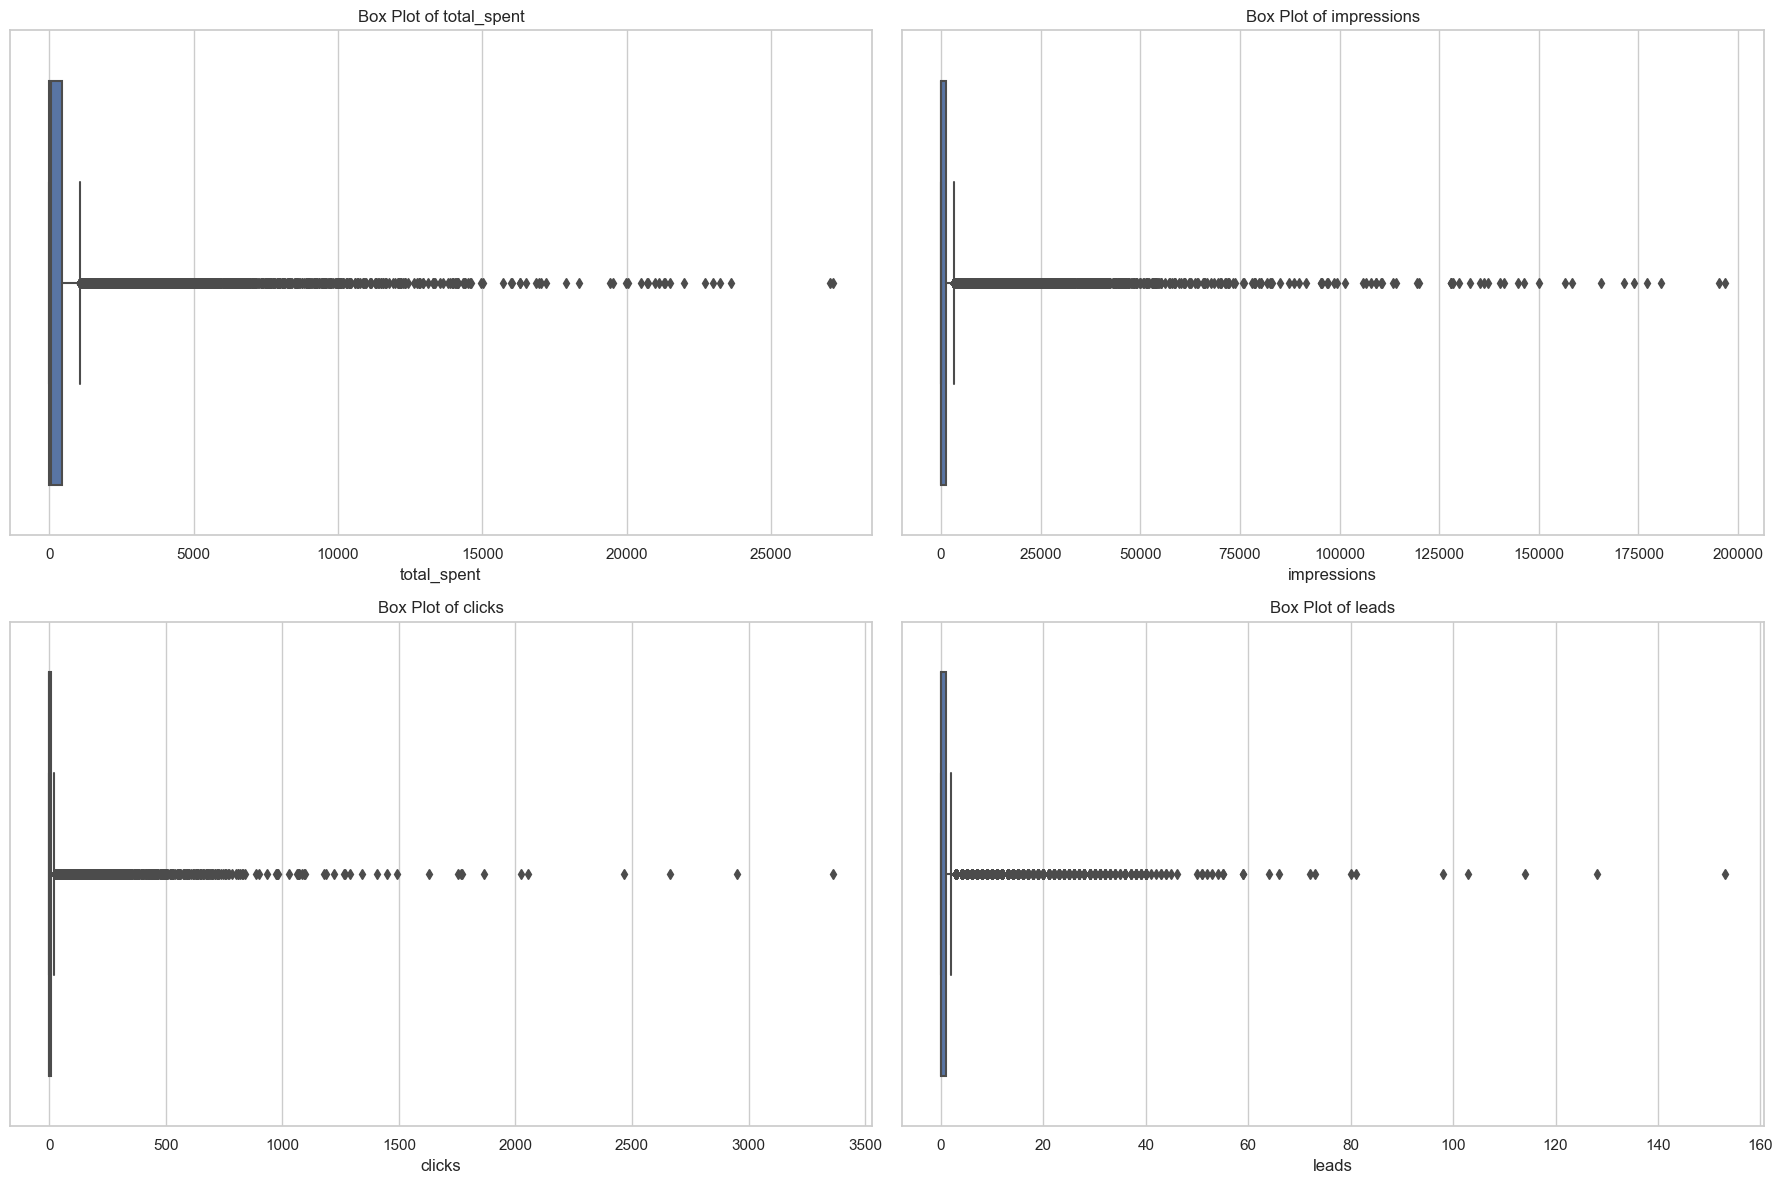

In [14]:


# Set the style for the plots
sns.set(style="whitegrid")

# List of numerical columns to plot
columns_to_plot = ['total_spent', 'impressions', 'clicks', 'leads']

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Plot box plots for each numerical column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


Based on our analysis of the data and graphs, we observed a skewed distribution, indicating the presence of outliers. Although the Interquartile Range (IQR) method is a standard approach for handling outliers, applying it in this case would result in the removal of a significant portion of the data. Considering the client's requirements and the necessity to retain all data points for comprehensive analysis, we recommend not removing any outliers in this dataset. This approach will ensure that the integrity of the dataset is maintained while fulfilling the client's needs.

# EDA

# Univariate Analysis

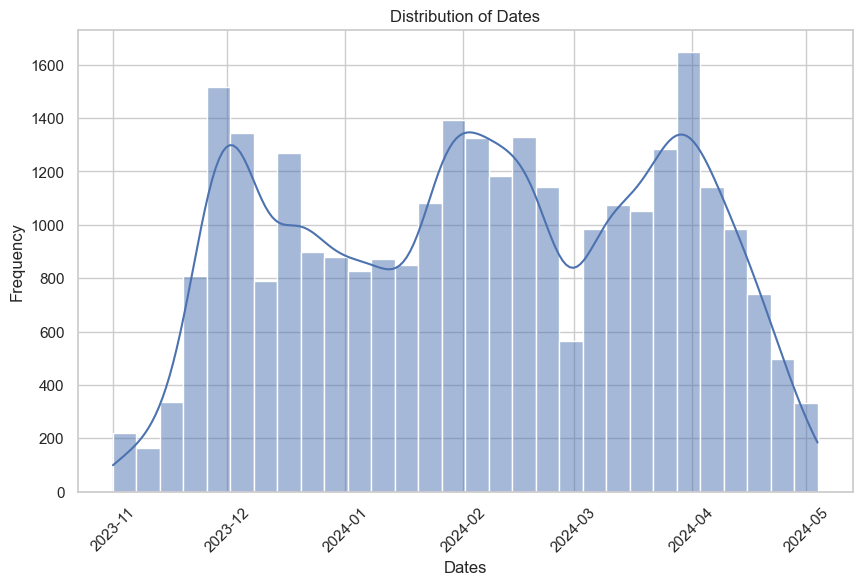

In [15]:
# Dates
plt.figure(figsize=(10, 6))
sns.histplot(df['dates'], bins=30, kde=True)
plt.title('Distribution of Dates')
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Distribution of dates across the dataset.we can see that these were mostly high in the months of December,February and April.

Distribution of Numerical columns

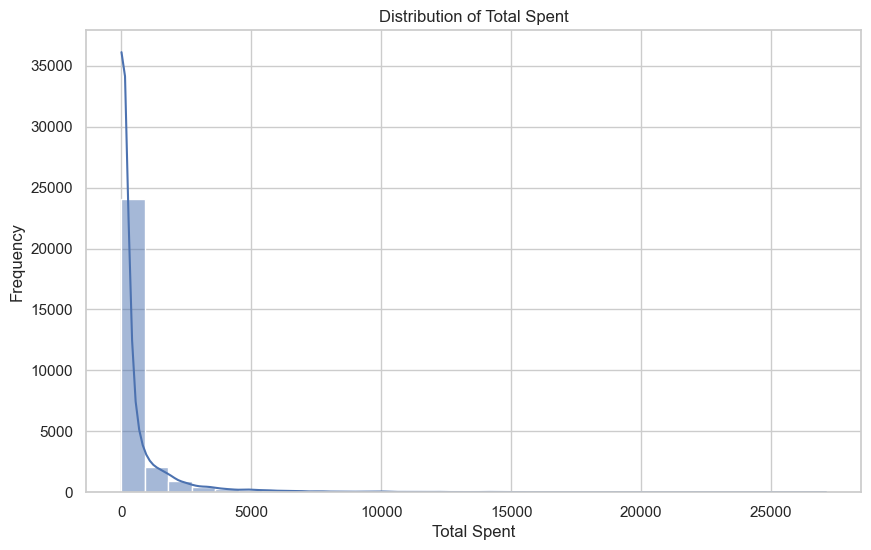

Mean :  554.6046712693629
Median :  53.285
Min :  0.0
Max :  27125.36


In [16]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of total_spent
plt.figure(figsize=(10, 6))
sns.histplot(df['total_spent'], bins=30, kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

print("Mean : ",df['total_spent'].mean())
print("Median : ",df['total_spent'].median())
print("Min : ",df['total_spent'].min())
print("Max : ",df['total_spent'].max())

This skewness towards lower total spent suggests that most of the campaigns or data points in our dataset have relatively fewer total spent, with a concentration of values between 100 and 1000. 

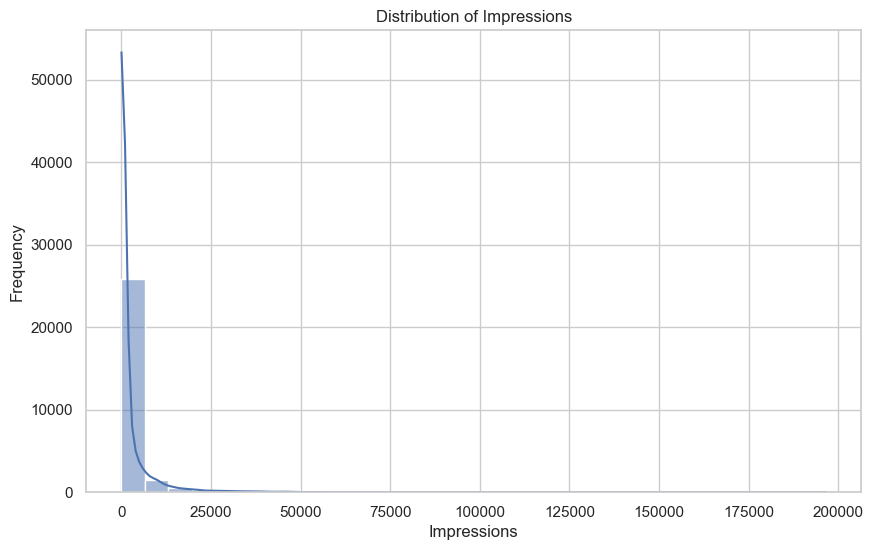

Mean :  2381.018399102825
Median :  107.0
Min :  0
Max :  196585


In [17]:
# Plot the distribution of impressions
plt.figure(figsize=(10, 6))
sns.histplot(df['impressions'], bins=30, kde=True)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()


print("Mean : ",df['impressions'].mean())
print("Median : ",df['impressions'].median())
print("Min : ",df['impressions'].min())
print("Max : ",df['impressions'].max())

This skewness towards lower impressions suggests that most of the campaigns or data points in our dataset have relatively fewer impressions, with a concentration of values between 100 and 1000.

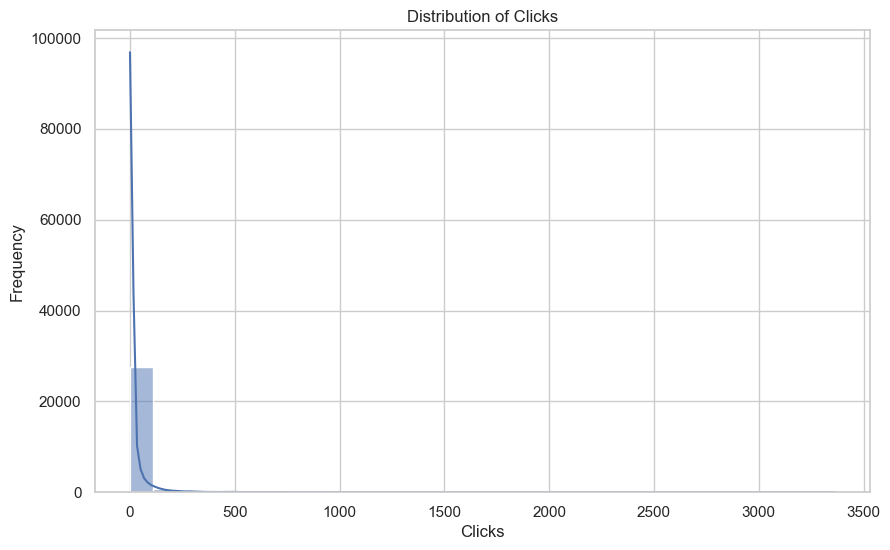

Mean :  18.770624518118737
Median :  1.0
Min :  0
Max :  3361


In [18]:
# Plot the distribution of clicks
plt.figure(figsize=(10, 6))
sns.histplot(df['clicks'], bins=30, kde=True)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

print("Mean : ",df['clicks'].mean())
print("Median : ",df['clicks'].median())
print("Min : ",df['clicks'].min())
print("Max : ",df['clicks'].max())

This skewness towards lower clicks suggests that most of the campaigns or data points in our dataset have relatively fewer clicks, with a concentration of values between 0 and 100.

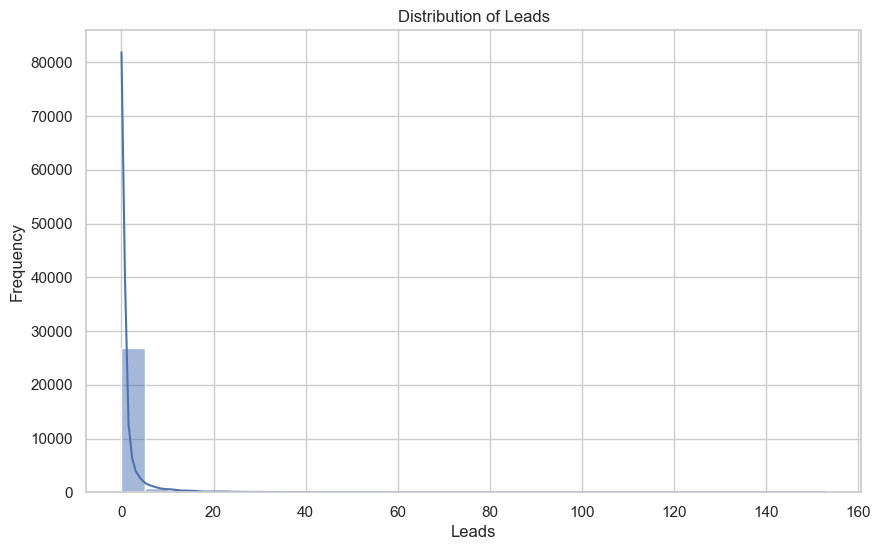

Mean :  1.1915258989275952
Median :  0.0
Min :  0
Max :  153


In [19]:
# Plot the distribution of leads
plt.figure(figsize=(10, 6))
sns.histplot(df['leads'], bins=30, kde=True)
plt.title('Distribution of Leads')
plt.xlabel('Leads')
plt.ylabel('Frequency')
plt.show()

print("Mean : ",df['leads'].mean())
print("Median : ",df['leads'].median())
print("Min : ",df['leads'].min())
print("Max : ",df['leads'].max())

This skewness towards lower leads suggests that most of the campaigns or data points in our dataset have relatively fewer impressions, with a concentration of values between 0 and 5.We should improve the campaigns with '0' leads or spend less on them.

Distribution of categorical columns

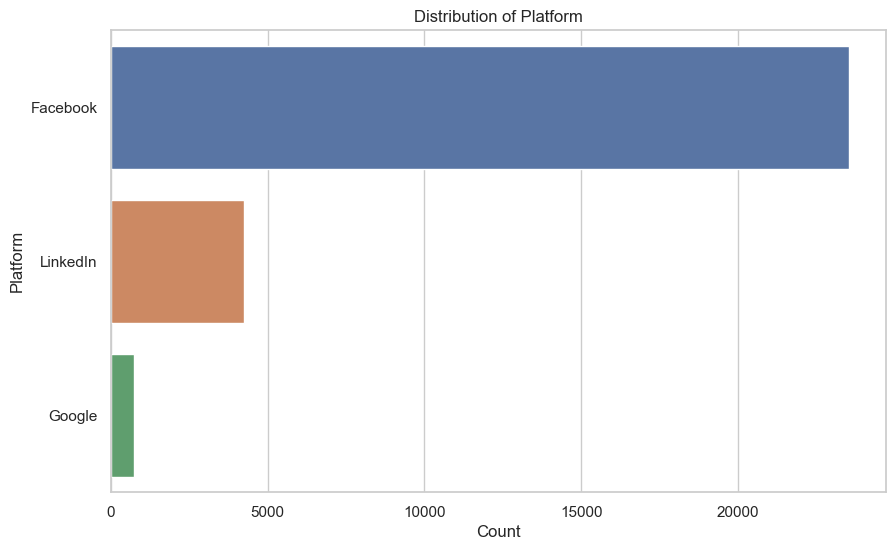

In [20]:


# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'platform' column
sns.countplot(y=df['platform'], order=df['platform'].value_counts().index)

# Set the title and labels
plt.title('Distribution of Platform')
plt.xlabel('Count')
plt.ylabel('Platform')

# Show the plot
plt.show()

The dataset shows that most of the data points are from Facebook.This suggests that Facebook dominates the dataset, potentially influencing the overall trends and insights derived from the data.

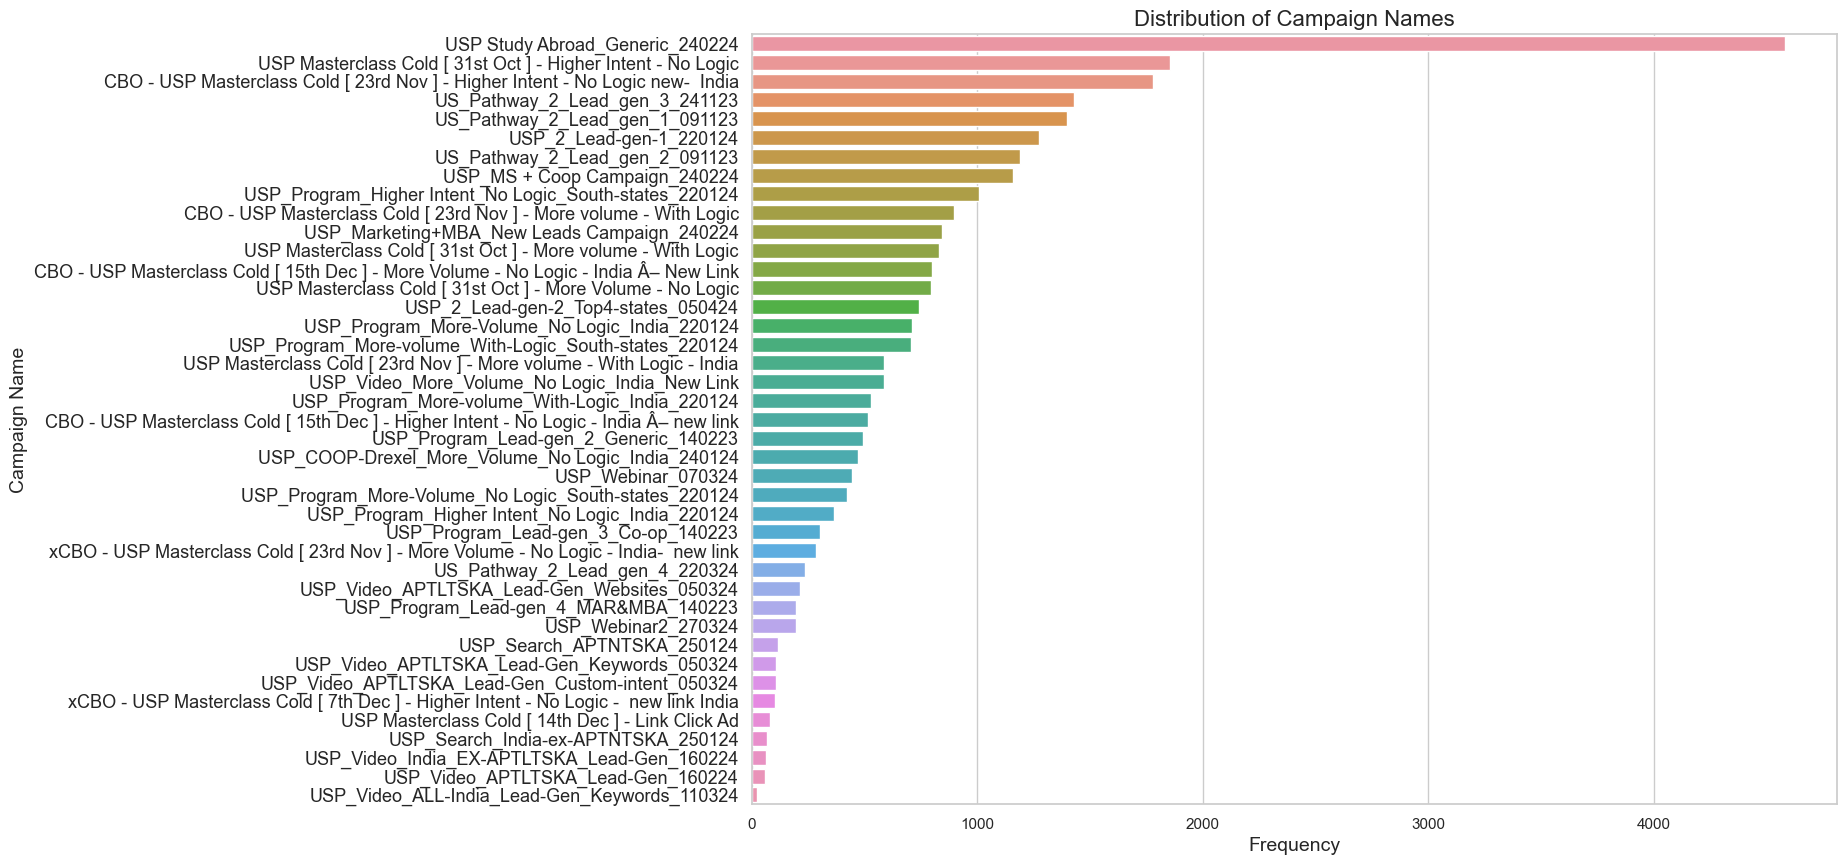

In [21]:


# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of campaign_name
plt.figure(figsize=(14, 10))
campaign_name_order = df['campaign_name'].value_counts().index
ax = sns.countplot(y=df['campaign_name'], order=campaign_name_order)
plt.title('Distribution of Campaign Names', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)

# Rotate the labels for better visibility
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=13)

plt.show()


The distribution of campaign names indicates that campaigns with more data points generally have higher reach. This is inferred from the fact that campaigns with a larger number of impressions tend to have a higher frequency of occurrences in the dataset. Therefore, campaigns with more data points are likely to have achieved broader reach or engagement.

# Bivariate Analysis

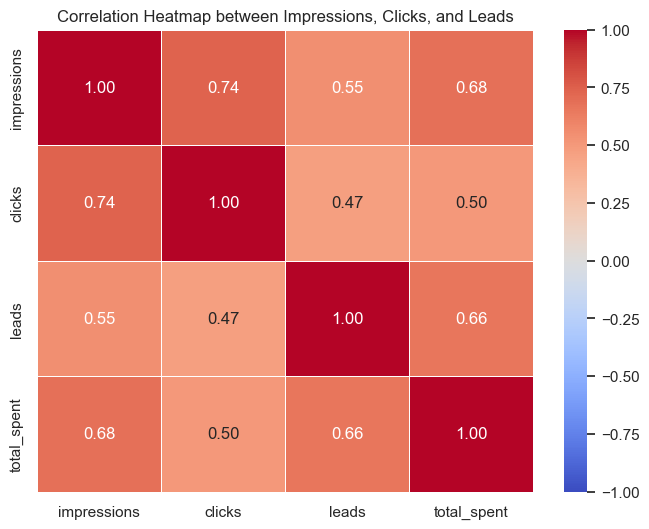

In [22]:


# Select the columns to analyze
columns_to_analyze = ['impressions', 'clicks', 'leads','total_spent']

# Compute the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Impressions, Clicks, and Leads')
plt.show()


The correlation matrix provides a rough overview of the relationships between the columns in our dataset.
Eg.Impressions and cliks have strong +ve correlation,clicks and leads have weak +ve correlation,impressions and leads have moderately +ve correlation,impressions and total_spent have moderately +ve correlation,clicks and total_spent have moderate +ve correlation,leads and total_spent have moderate +ve correlation.

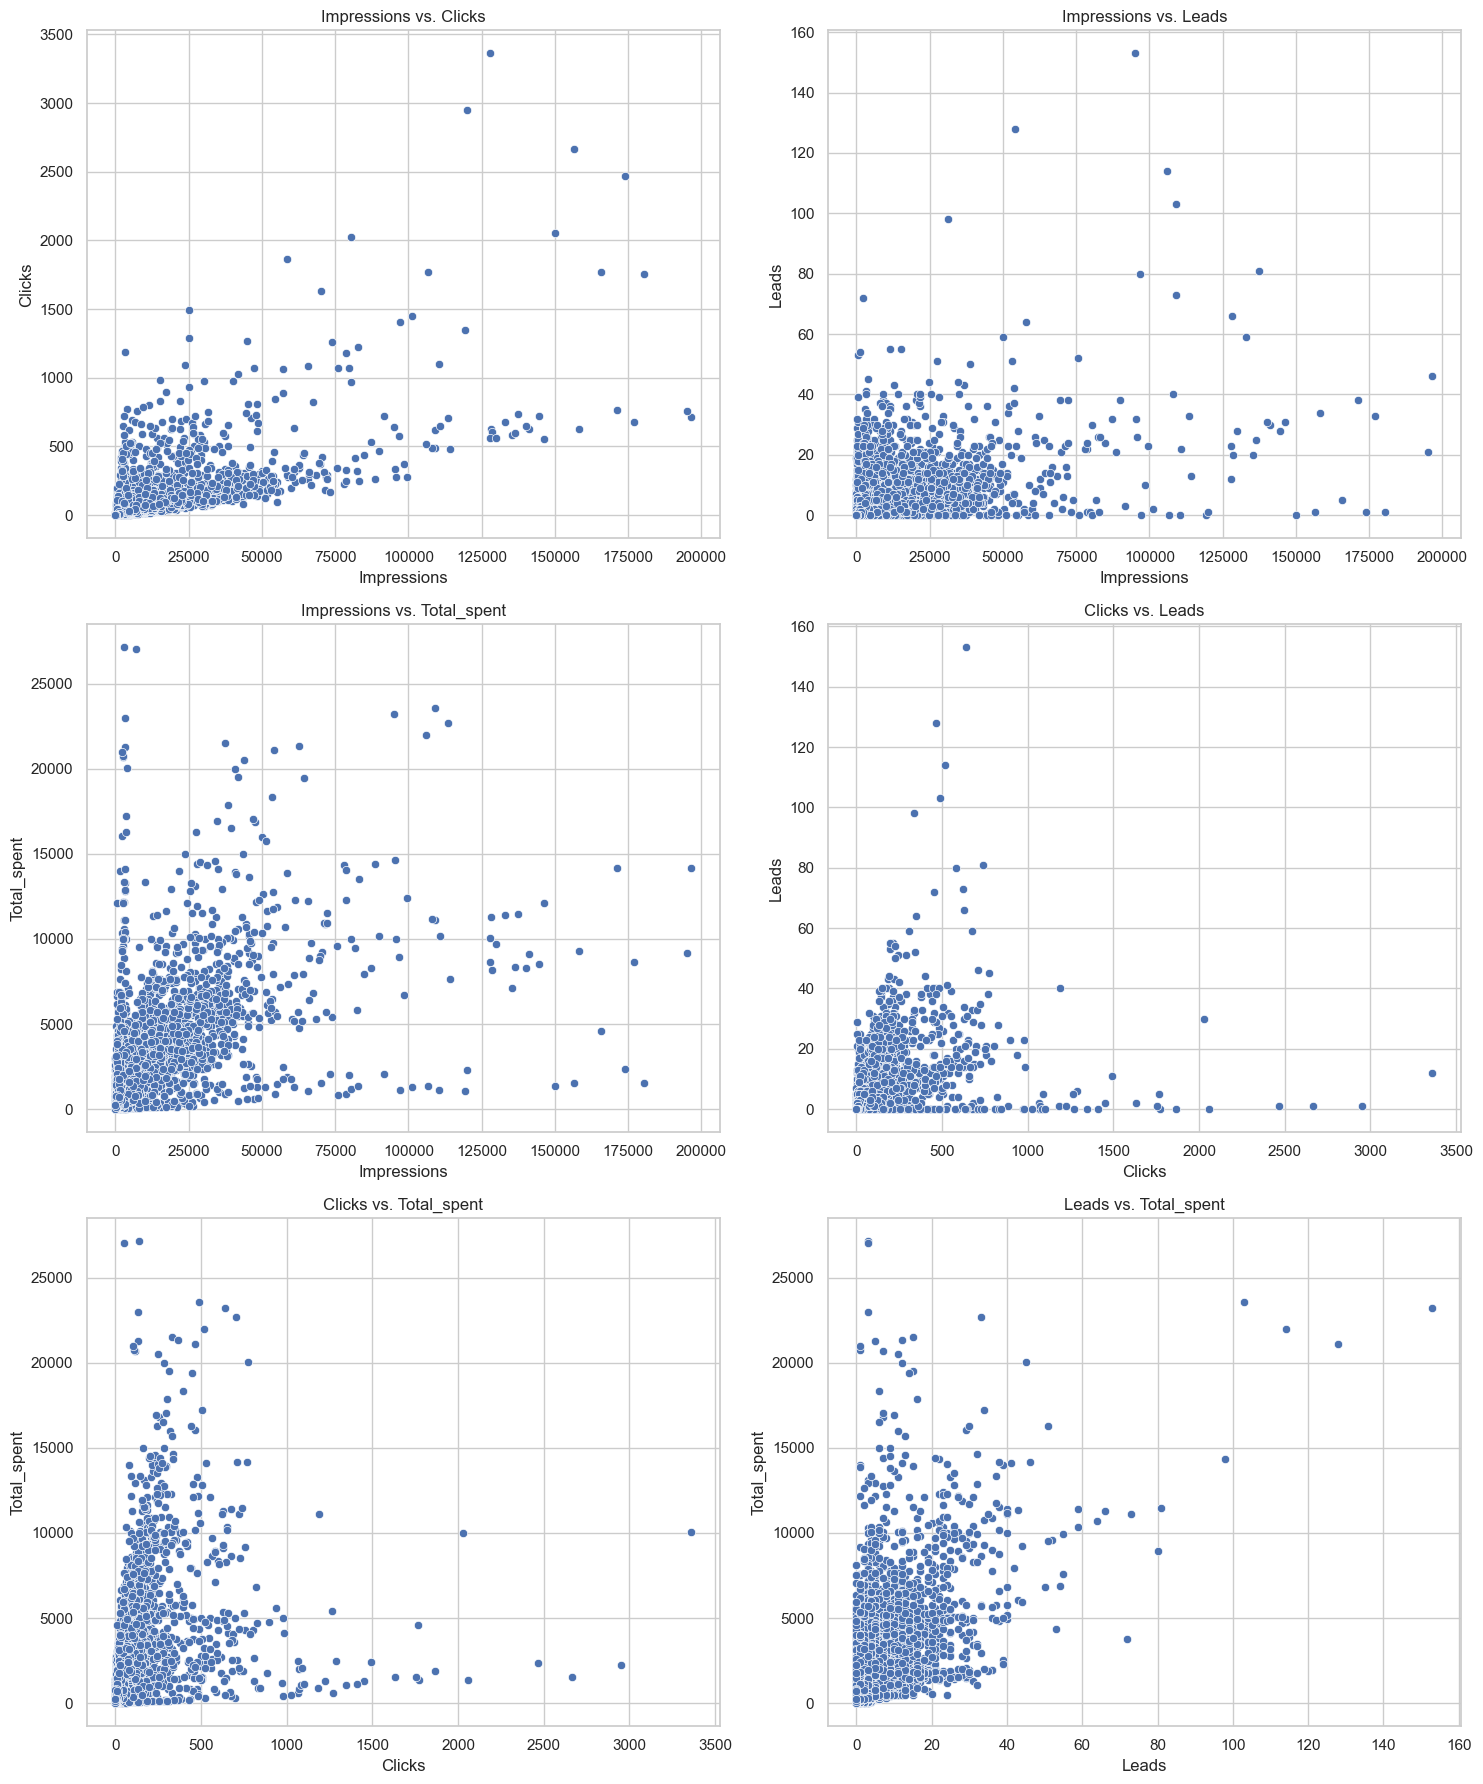

In [23]:
# Define the pairs of columns to create scatter plots for
pairs = [('impressions', 'clicks'), 
         ('impressions', 'leads'), 
         ('impressions', 'total_spent'), 
         ('clicks', 'leads'), 
         ('clicks', 'total_spent'), 
         ('leads', 'total_spent')]

# Create a 3x2 grid of scatter plots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

for ax, (x, y) in zip(axes.flatten(), pairs):
    sns.scatterplot(x=df[x], y=df[y], ax=ax)
    ax.set_title(f'{x.capitalize()} vs. {y.capitalize()}')
    ax.set_xlabel(x.capitalize())
    ax.set_ylabel(y.capitalize())

plt.tight_layout()
plt.show()


By visualizing these relationships, the scatterplots provide a graphical confirmation of the correlations observed in the matrix, offering a more intuitive understanding of the data dynamics.

In [24]:
df.head()

dates                        campaign_name  \
0 2024-04-29           USP_Search_APTNTSKA_250124   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name  
0            0.176000     25    Google            GMAT/GRE  
1            0.285352      1  Facebook  USP-2_KA_TN_050424  
2            0.296846      0  Facebook  USP-2_KA_TN_050424  
3            0.346620      0  Facebook  USP-2_KA_TN_050424  
4            0.682128      1  Facebook  USP-2_AP_TS_050424

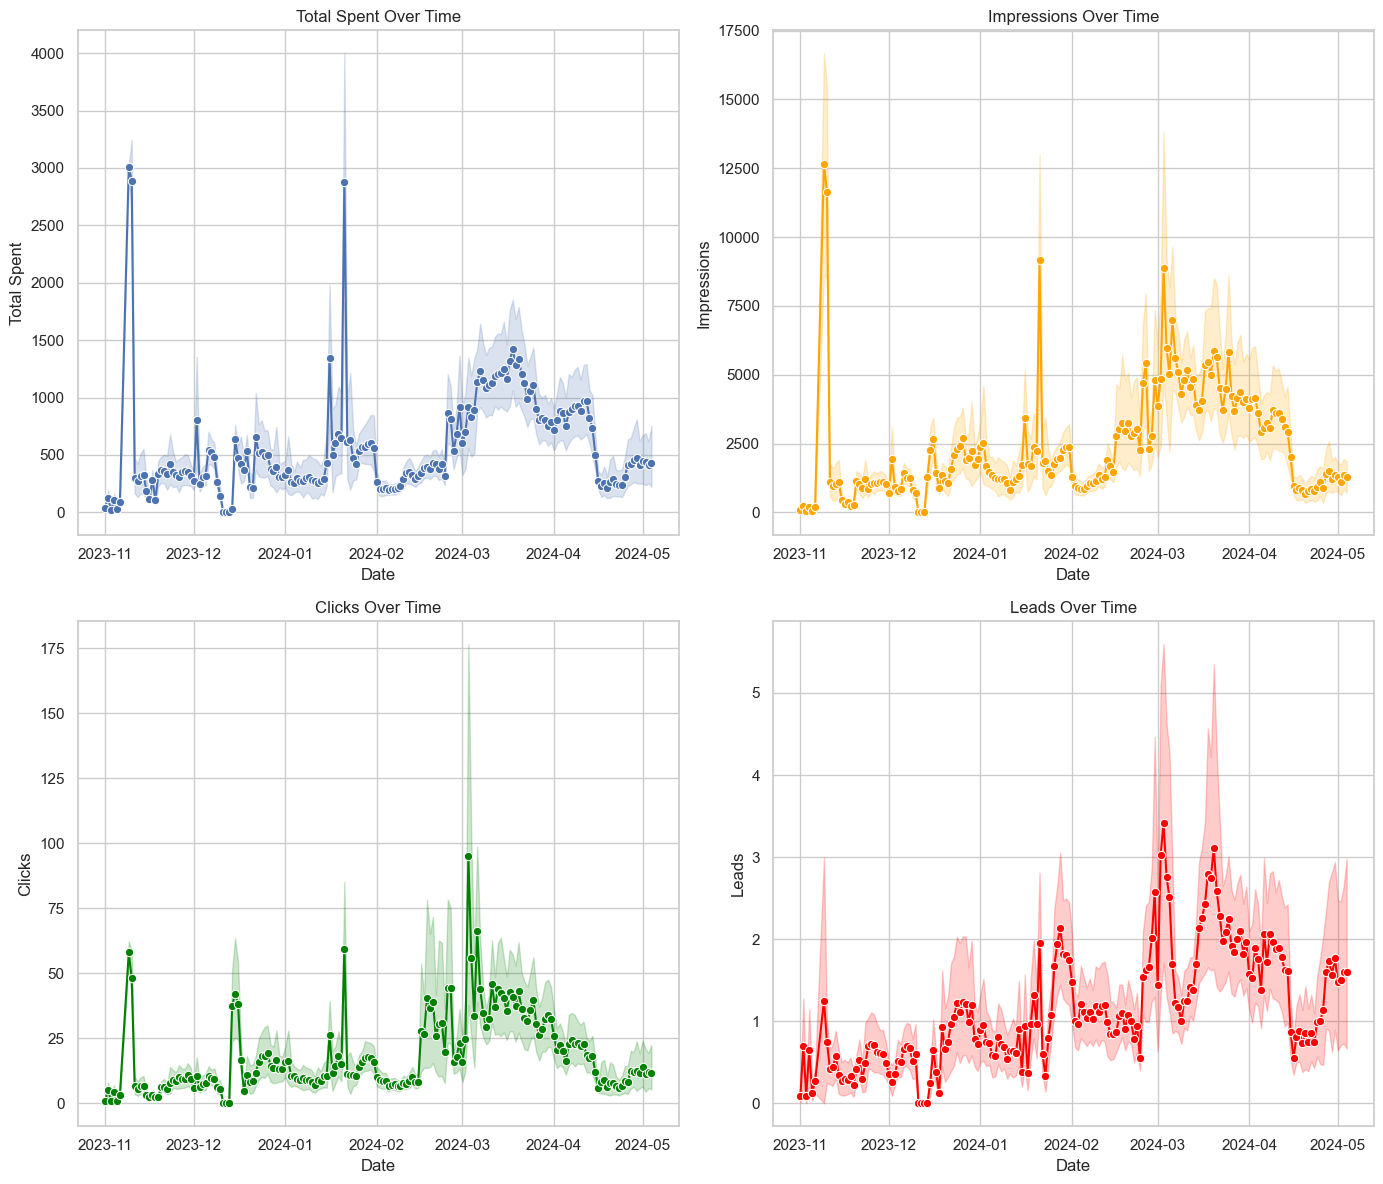

In [25]:


# Convert 'dates' to datetime format if not already done
df['dates'] = pd.to_datetime(df['dates'])

# Setting plot style
sns.set(style="whitegrid")

# Plotting each metric over time in separate subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Total Spent
sns.lineplot(ax=axs[0, 0], x='dates', y='total_spent', data=df, marker='o', color='b')
axs[0, 0].set_title('Total Spent Over Time')
axs[0, 0].set_xlabel('Date')  # Added x-axis label
axs[0, 0].set_ylabel('Total Spent')
axs[0, 0].grid(True)

# Impressions
sns.lineplot(ax=axs[0, 1], x='dates', y='impressions', data=df, marker='o', color='orange')
axs[0, 1].set_title('Impressions Over Time')
axs[0, 1].set_xlabel('Date')  # Added x-axis label
axs[0, 1].set_ylabel('Impressions')
axs[0, 1].grid(True)

# Clicks
sns.lineplot(ax=axs[1, 0], x='dates', y='clicks', data=df, marker='o', color='green')
axs[1, 0].set_title('Clicks Over Time')
axs[1, 0].set_xlabel('Date')  # Added x-axis label
axs[1, 0].set_ylabel('Clicks')
axs[1, 0].grid(True)

# Leads
sns.lineplot(ax=axs[1, 1], x='dates', y='leads', data=df, marker='o', color='red')
axs[1, 1].set_title('Leads Over Time')
axs[1, 1].set_xlabel('Date')  # Added x-axis label
axs[1, 1].set_ylabel('Leads')
axs[1, 1].grid(True)

# Adjusting layout to avoid overlap
plt.tight_layout()
plt.show()


Distribution of all the key metrics numerical columns according to the dates or time period using line plot ,and gives the observation of relations between them. We can see they mostly aligned.

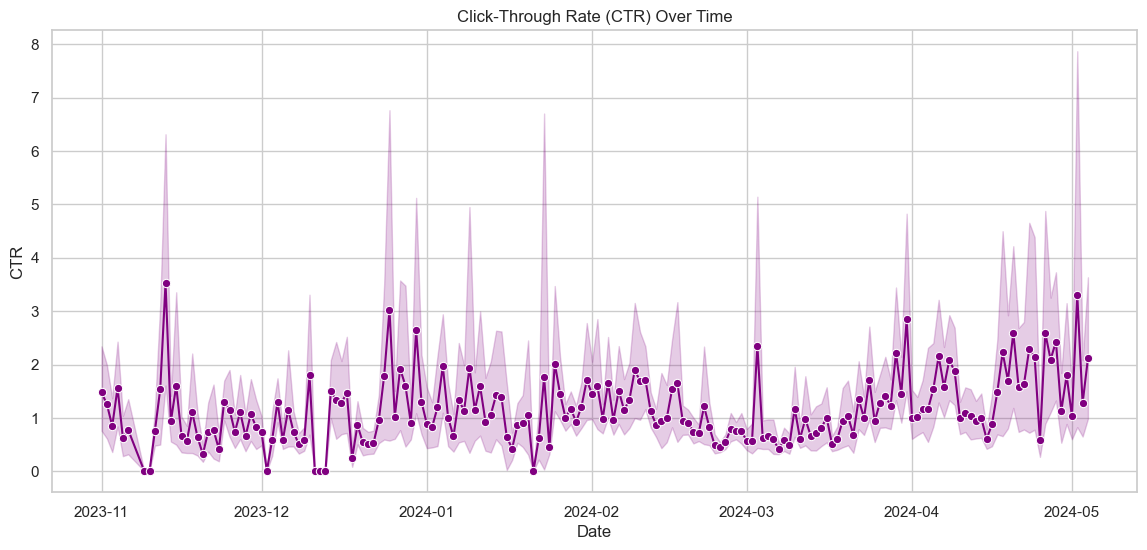

In [26]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='dates', y='click_through_rate', data=df, marker='o', color='purple')
plt.title('Click-Through Rate (CTR) Over Time')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.grid(True)
plt.show()

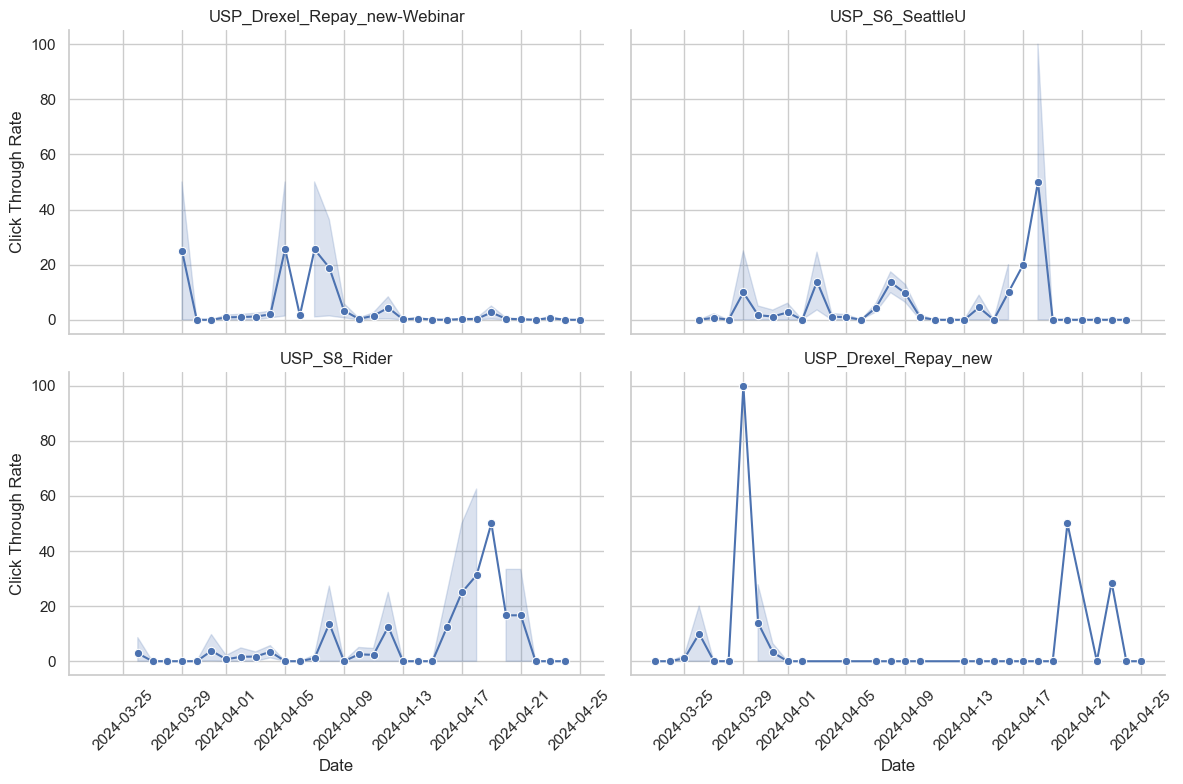

In [27]:


# Convert 'dates' to datetime format if not already done
df['dates'] = pd.to_datetime(df['dates'])

# Determine the top 4 creative_names by average click_through_rate
top_creative_names = df.groupby('creative_name')['click_through_rate'].mean().nlargest(4).index

# Filter the dataframe to only include the top 4 creative_names
df_top4 = df[df['creative_name'].isin(top_creative_names)]

# Setting plot style
sns.set(style="whitegrid")

# Plotting click_through_rate over time, faceted by creative_name
g = sns.FacetGrid(df_top4, col="creative_name", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "dates", "click_through_rate", marker="o")

# Adding titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Click Through Rate")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
# Adjusting layout to avoid overlap
plt.tight_layout()
plt.show()


The line plots show the click-through rates over time for the top 4 creative names. Each subplot reveals the performance trends for these creatives, highlighting periods of higher or lower click-through rates and allowing for comparison between them. This visualization helps identify which creative names perform consistently well or show notable fluctuations.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28534 entries, 0 to 28533
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   dates               28534 non-null  datetime64[ns]
 1   campaign_name       28534 non-null  object        
 2   creative_name       28534 non-null  object        
 3   total_spent         28534 non-null  float64       
 4   impressions         28534 non-null  int64         
 5   clicks              28534 non-null  int64         
 6   click_through_rate  28534 non-null  float64       
 7   leads               28534 non-null  int64         
 8   platform            28534 non-null  object        
 9   adset_name          28534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


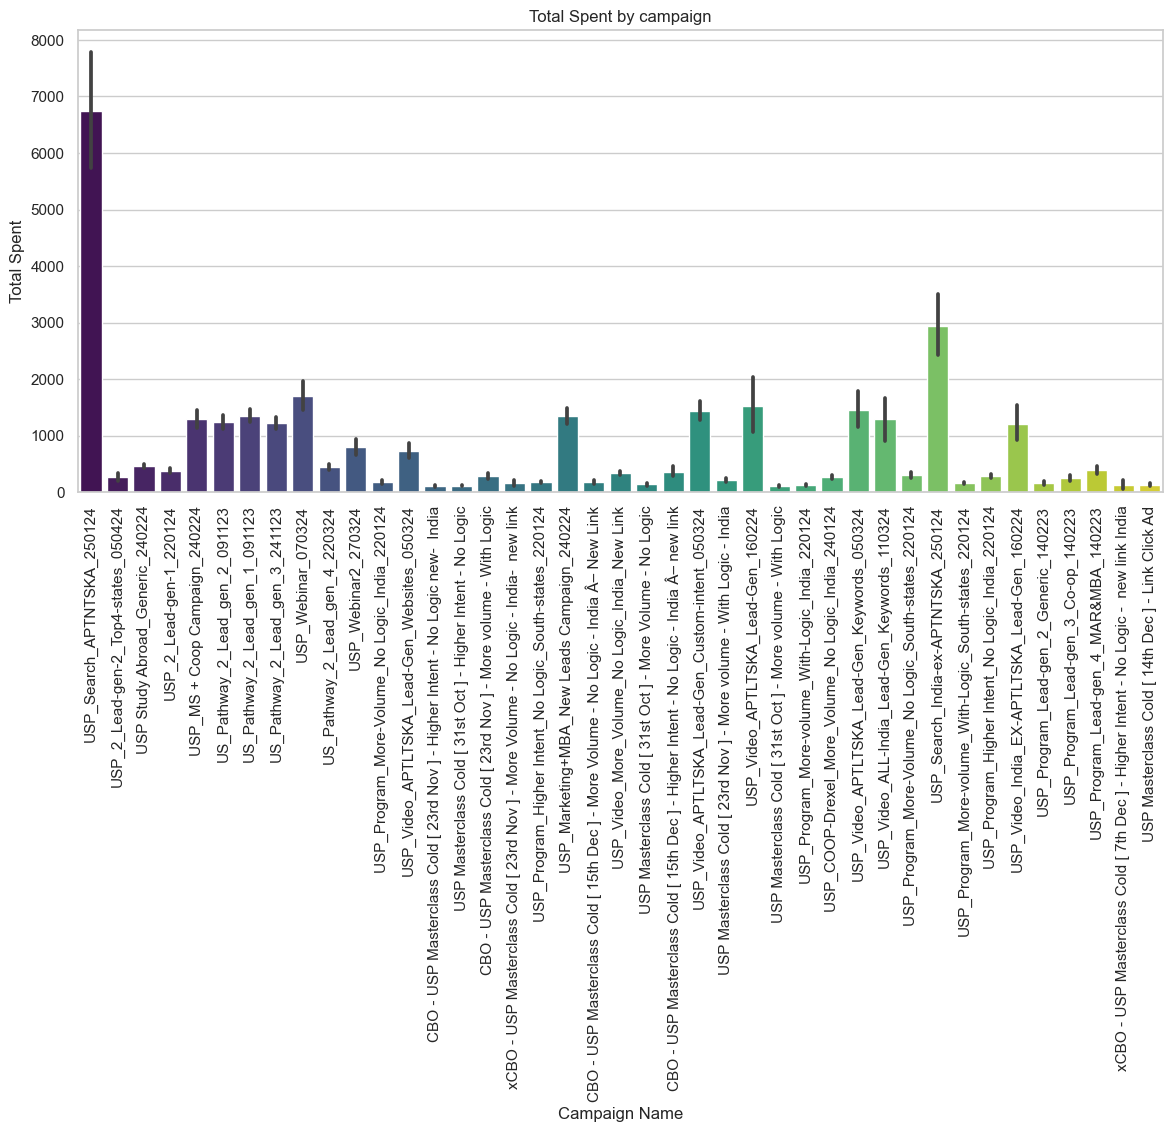

In [29]:
# Plot total_spent by adset_name
plt.figure(figsize=(14, 6))
sns.barplot(x='campaign_name', y='total_spent', data=df, palette='viridis')
plt.title('Total Spent by campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.show()

This analysis displays the campaigns with the highest expenditure. By examining these plots, we can identify which campaigns have the greatest financial investment, indicating where the most money is spent.

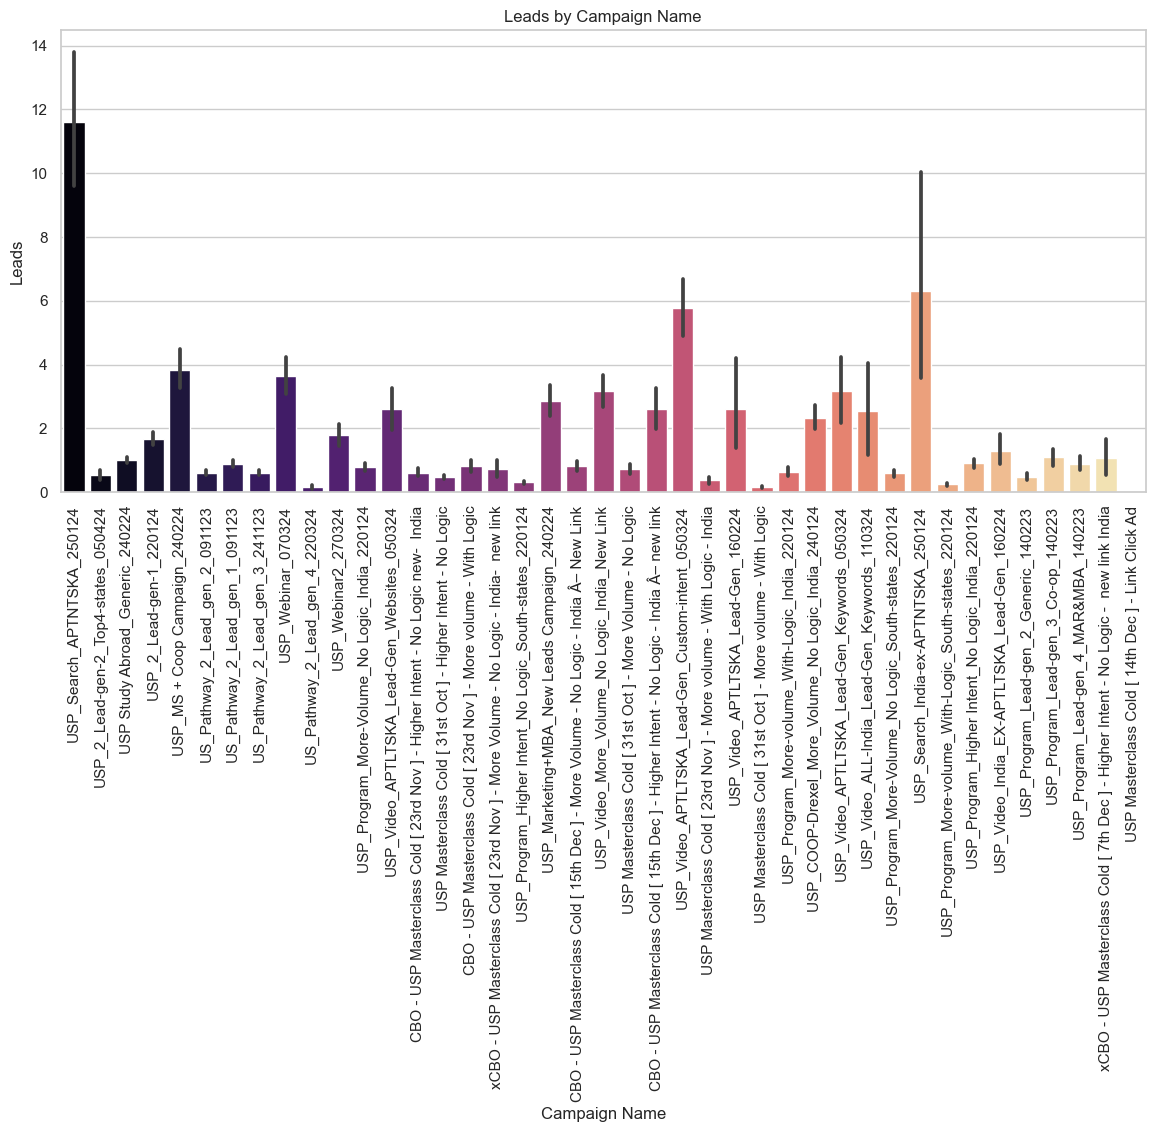

In [30]:
# Plot leads by campaign_name
plt.figure(figsize=(14, 6))
sns.barplot(x='campaign_name', y='leads', data=df, palette='magma')
plt.title('Leads by Campaign Name')
plt.xlabel('Campaign Name')
plt.ylabel('Leads')
plt.xticks(rotation=90)
plt.show()


This analysis shows the campaigns and their associated leads. By visualizing this data, we can identify which campaigns are generating the most leads and assess their effectiveness in driving lead generation.

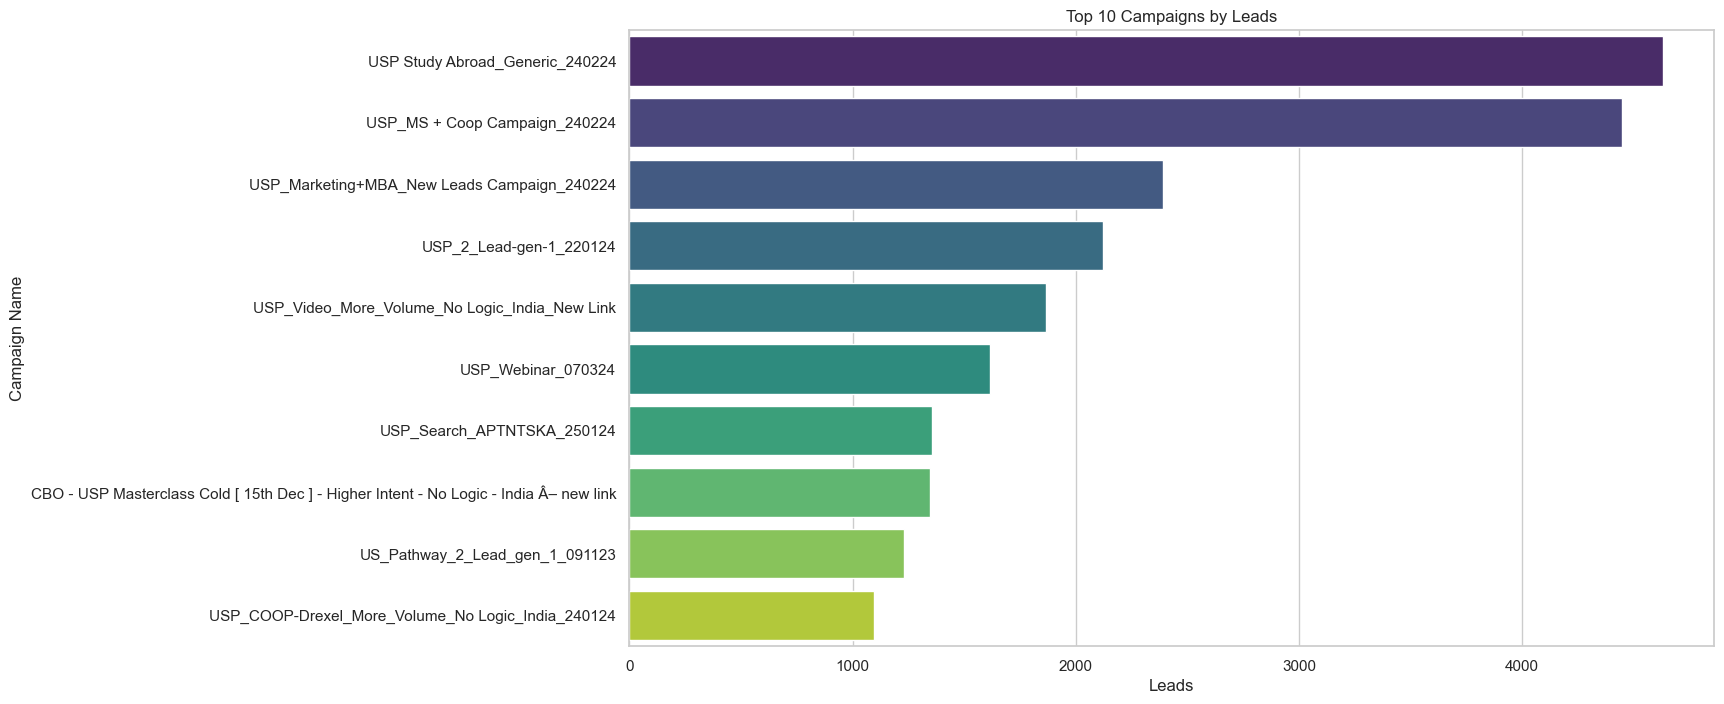

In [31]:


# Aggregate data by campaign name and calculate total spent, impressions, clicks, and leads
campaign_metrics1 = df.groupby(['campaign_name','platform'])[['total_spent', 'impressions', 'clicks', 'leads']].sum().reset_index()

# Sort the data by leads in descending order and get the top 10 campaigns
top_10_campaigns = campaign_metrics1.sort_values(by='leads', ascending=False).head(10)



# Plot the top 10 campaigns by leads
plt.figure(figsize=(14, 8))
sns.barplot(x='leads', y='campaign_name', data=top_10_campaigns, palette='viridis')
plt.title('Top 10 Campaigns by Leads')
plt.xlabel('Leads')
plt.ylabel('Campaign Name')
plt.show()


The analysis highlights the top 10 campaigns that generated the most leads and their distribution. By examining this data, we can identify which campaigns were most successful in lead generation and observe how leads are distributed across these top-performing campaigns.As their total spent is mostly alligned with the leads.

In [32]:

# Display details of the top 10 campaigns
print("Details of Top 10 Campaigns by Leads:")
print(top_10_campaigns)


Details of Top 10 Campaigns by Leads:
                                        campaign_name  platform  total_spent  \
9                     USP Study Abroad_Generic_240224  Facebook   2126684.24   
13                      USP_MS + Coop Campaign_240224  Facebook   1501040.54   
14        USP_Marketing+MBA_New Leads Campaign_240224  Facebook   1125425.52   
10                            USP_2_Lead-gen-1_220124  Facebook    484768.66   
32      USP_Video_More_Volume_No Logic_India_New Link  Facebook    198416.23   
34                                 USP_Webinar_070324  Facebook    752657.01   
24                         USP_Search_APTNTSKA_250124    Google    789571.12   
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...  Facebook    186700.48   
35                     US_Pathway_2_Lead_gen_1_091123  LinkedIn   1884063.88   
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124  Facebook    126657.36   

    impressions  clicks  leads  
9       9265548   48531   4630  
13      4506382

This information provides a comprehensive view of the performance of the top campaigns, showing how investment (total spend) correlates with engagement (clicks) and effectiveness (leads).

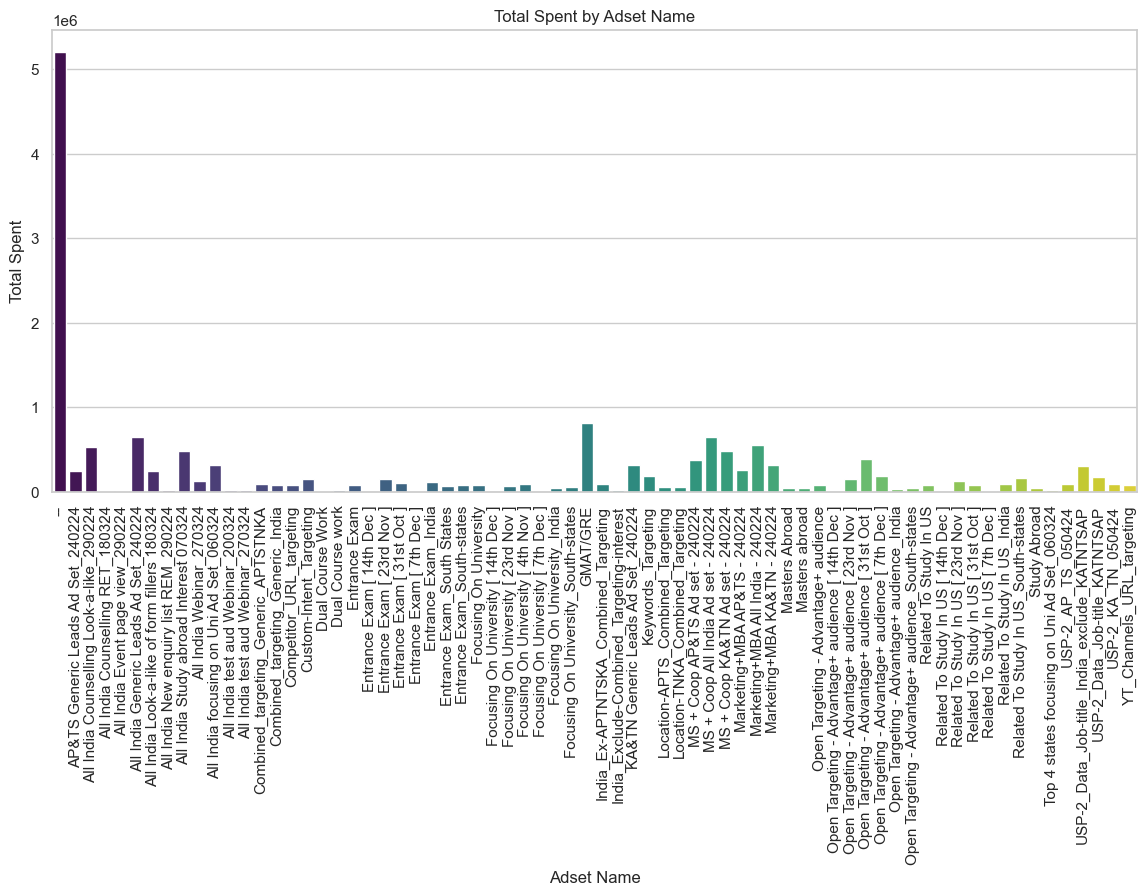

In [33]:

# Group by adset_name and sum the total_spent
total_spent_by_adset = df.groupby('adset_name')['total_spent'].sum().reset_index()

# Plotting the total_spent by adset_name
plt.figure(figsize=(14, 6))
sns.barplot(x='adset_name', y='total_spent', data=total_spent_by_adset, palette='viridis')
plt.title('Total Spent by Adset Name')
plt.xlabel('Adset Name')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.show()


The bar chart displays total spend across different ad sets, highlighting which ad sets received the most investment and allowing for easy comparison of spending levels.

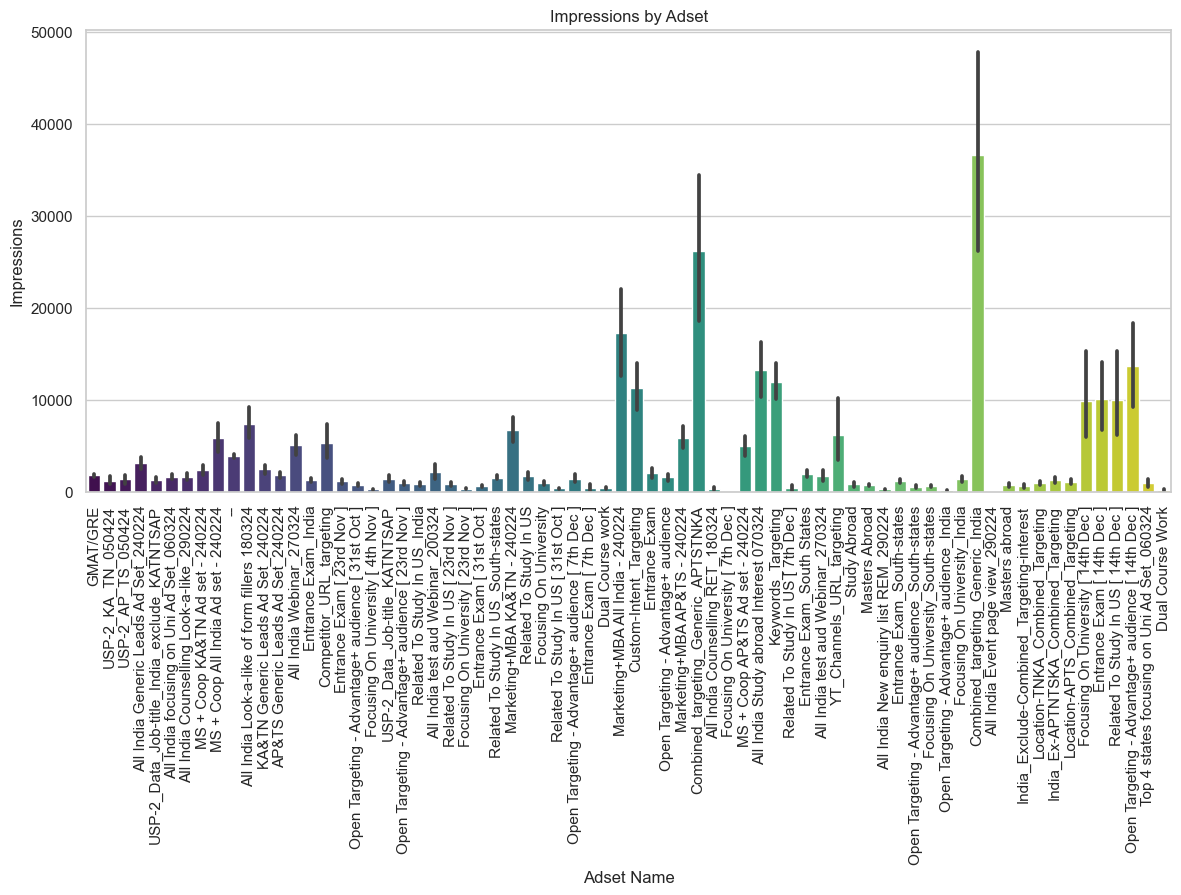

In [34]:
# Plot impressions by adset_name
plt.figure(figsize=(14, 6))
sns.barplot(x='adset_name', y='impressions', data=df, palette='viridis')
plt.title('Impressions by Adset')
plt.xlabel('Adset Name')
plt.ylabel('Impressions')
plt.xticks(rotation=90)
plt.show()

The chart shows the distribution of impressions across different ad sets, revealing which ad sets generated the most impressions and allowing for comparison of their reach.The chart reveals variations in reach, helping identify which ad sets were more effective in capturing audience attention.

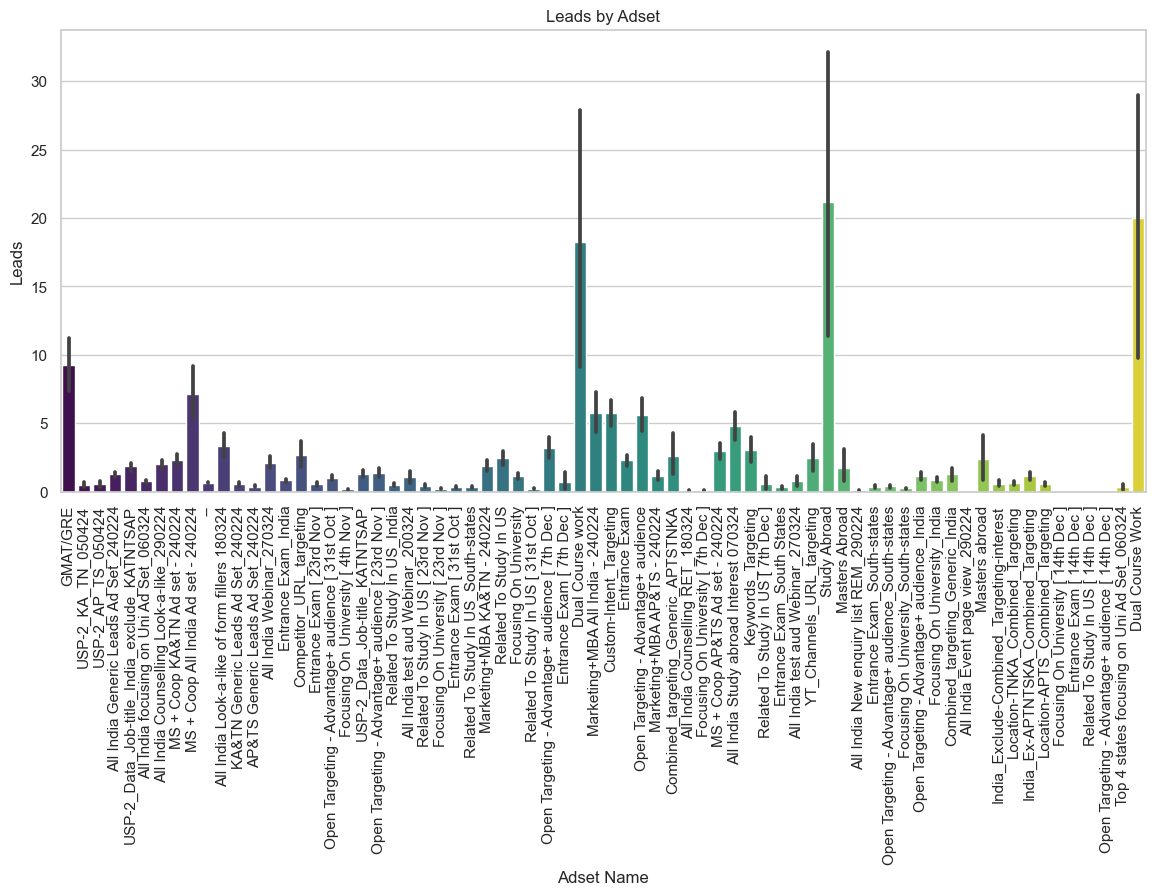

In [35]:
# Plot leads by adset_name
plt.figure(figsize=(14, 6))
sns.barplot(x='adset_name', y='leads', data=df, palette='viridis')
plt.title('Leads by Adset')
plt.xlabel('Adset Name')
plt.ylabel('Leads')
plt.xticks(rotation=90)
plt.show()

The chart shows the distribution of leads across different ad sets, highlighting which ad sets generated the most leads. It allows for comparison of lead generation performance between ad sets, revealing which ones were most effective at converting impressions into leads. This insight can help evaluate the effectiveness of various ad sets and inform strategies to optimize lead generation efforts.

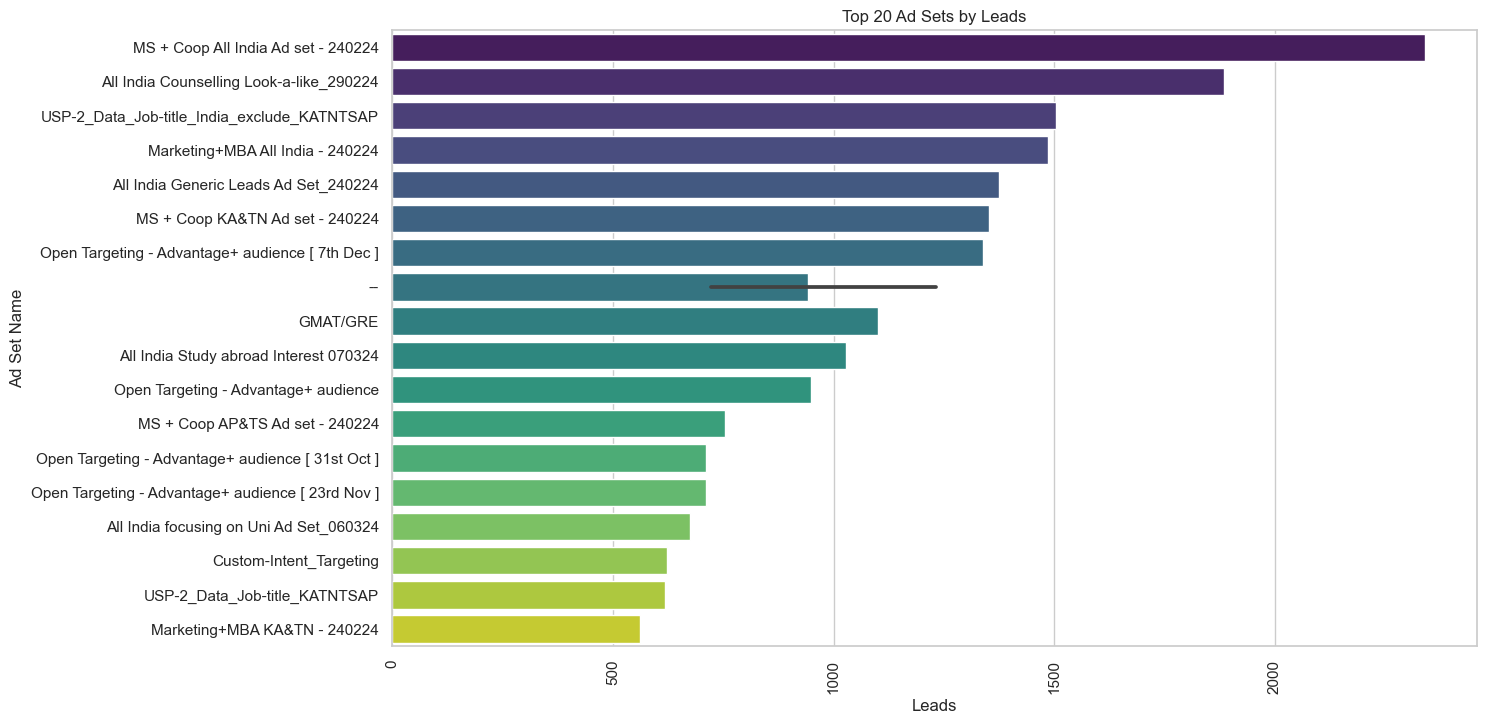

In [36]:
# Aggregate data by adset_name and calculate total spent, impressions, clicks, and leads
adset_metrics = df.groupby(['adset_name', 'campaign_name','platform'])[['total_spent', 'impressions', 'clicks', 'leads']].sum().reset_index()

# Sort the data by leads in descending order and get the top 20 ad sets
top_20_adsets = adset_metrics.sort_values(by='leads', ascending=False).head(20)


# Plot the top 20 ad sets by leads
plt.figure(figsize=(14, 8))
sns.barplot(x='leads', y='adset_name', data=top_20_adsets, palette='viridis')
plt.title('Top 20 Ad Sets by Leads')
plt.xlabel('Leads')
plt.ylabel('Ad Set Name')
plt.xticks(rotation=90)
plt.show()




The chart displays the top 20 ad sets ranked by lead generation, showcasing which ad sets were the most effective at producing leads. It enables a clear comparison of lead performance among these top ad sets and helps identify which ones delivered the best results. This insight can guide future marketing strategies and optimize lead generation efforts.

In [37]:
# Display details of the top 20 ad sets
print("Details of Top 20 Ad Sets by Leads:")
print(top_20_adsets)

Details of Top 20 Ad Sets by Leads:
                                            adset_name  \
73                 MS + Coop All India Ad set - 240224   
5             All India Counselling Look-a-like_290224   
116        USP-2_Data_Job-title_India_exclude_KATNTSAP   
76                    Marketing+MBA All India - 240224   
8                All India Generic Leads Ad Set_240224   
74                     MS + Coop KA&TN Ad set - 240224   
90    Open Targeting - Advantage+ audience [ 7th Dec ]   
0                                                   --   
55                                            GMAT/GRE   
11              All India Study abroad Interest 070324   
81                Open Targeting - Advantage+ audience   
2                                                   --   
72                     MS + Coop AP&TS Ad set - 240224   
1                                                   --   
86   Open Targeting - Advantage+ audience [ 31st Oct ]   
83   Open Targeting - Advantage+ aud

This details the top 20 ad sets by lead generation, including key metrics such as campaign name, impressions, clicks, and leads. This comprehensive view highlights which ad sets were most effective in generating leads and provides a comparison of their performance across various metrics. By analyzing these details, we can identify high-performing ad sets and understand their contribution to overall campaign success.

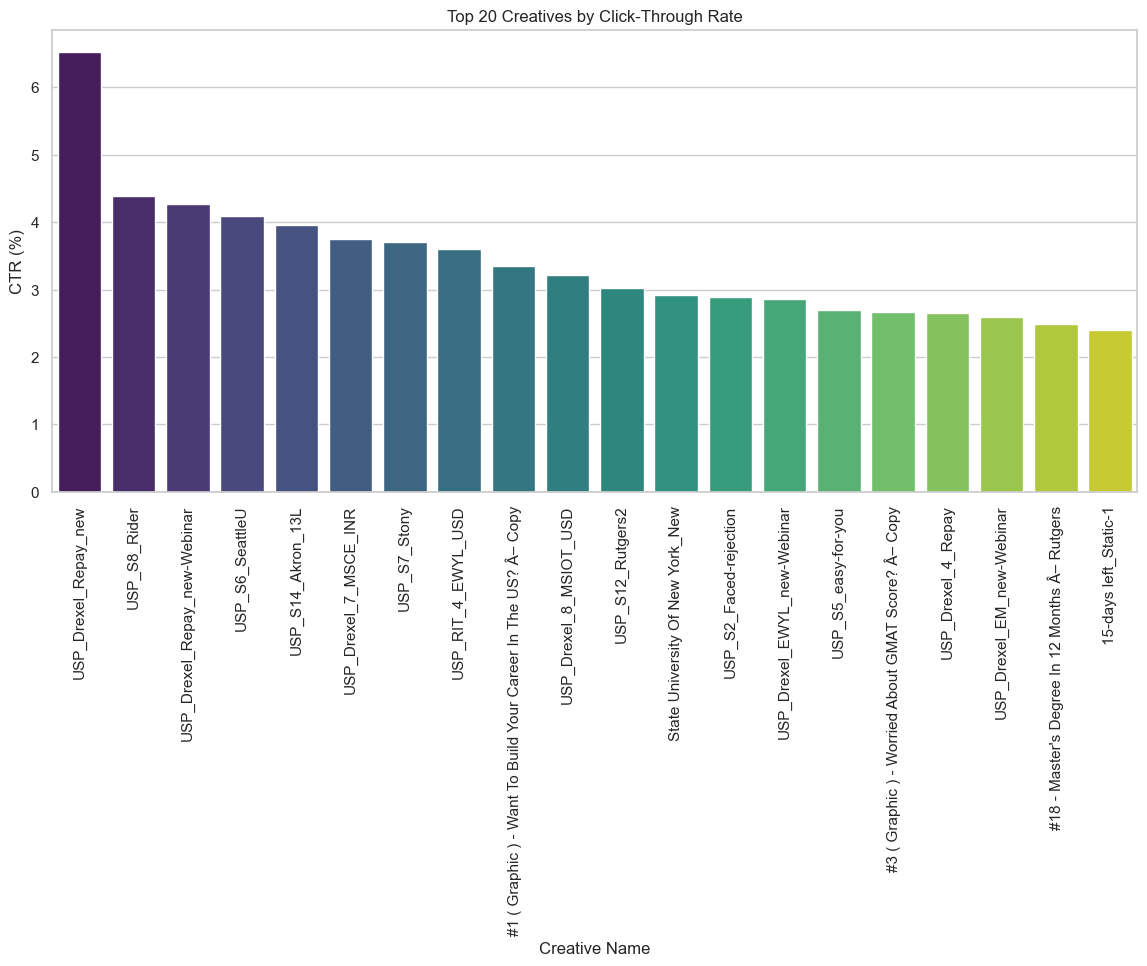

In [38]:
# Aggregate data by creative name and calculate the mean CTR
creative_ctr = df.groupby('creative_name')['click_through_rate'].mean().reset_index()

# Sort the data by CTR in descending order and get the top 20
top_creatives_by_ctr = creative_ctr.sort_values(by='click_through_rate', ascending=False).head(20)

# Plot CTR by creative name
plt.figure(figsize=(14, 6))
sns.barplot(x='creative_name', y='click_through_rate', data=top_creatives_by_ctr, palette='viridis')
plt.title('Top 20 Creatives by Click-Through Rate')
plt.xlabel('Creative Name')
plt.ylabel('CTR (%)')
plt.xticks(rotation=90)
plt.show()

The chart displays the top 20 creative names ranked by click-through rate (CTR). It reveals which creatives achieved the highest engagement rates. By showcasing the CTR for these top-performing creatives, the chart allows for a comparison of their effectiveness in driving clicks relative to impressions. This insight helps identify the most successful creative strategies and can inform future design and targeting decisions.

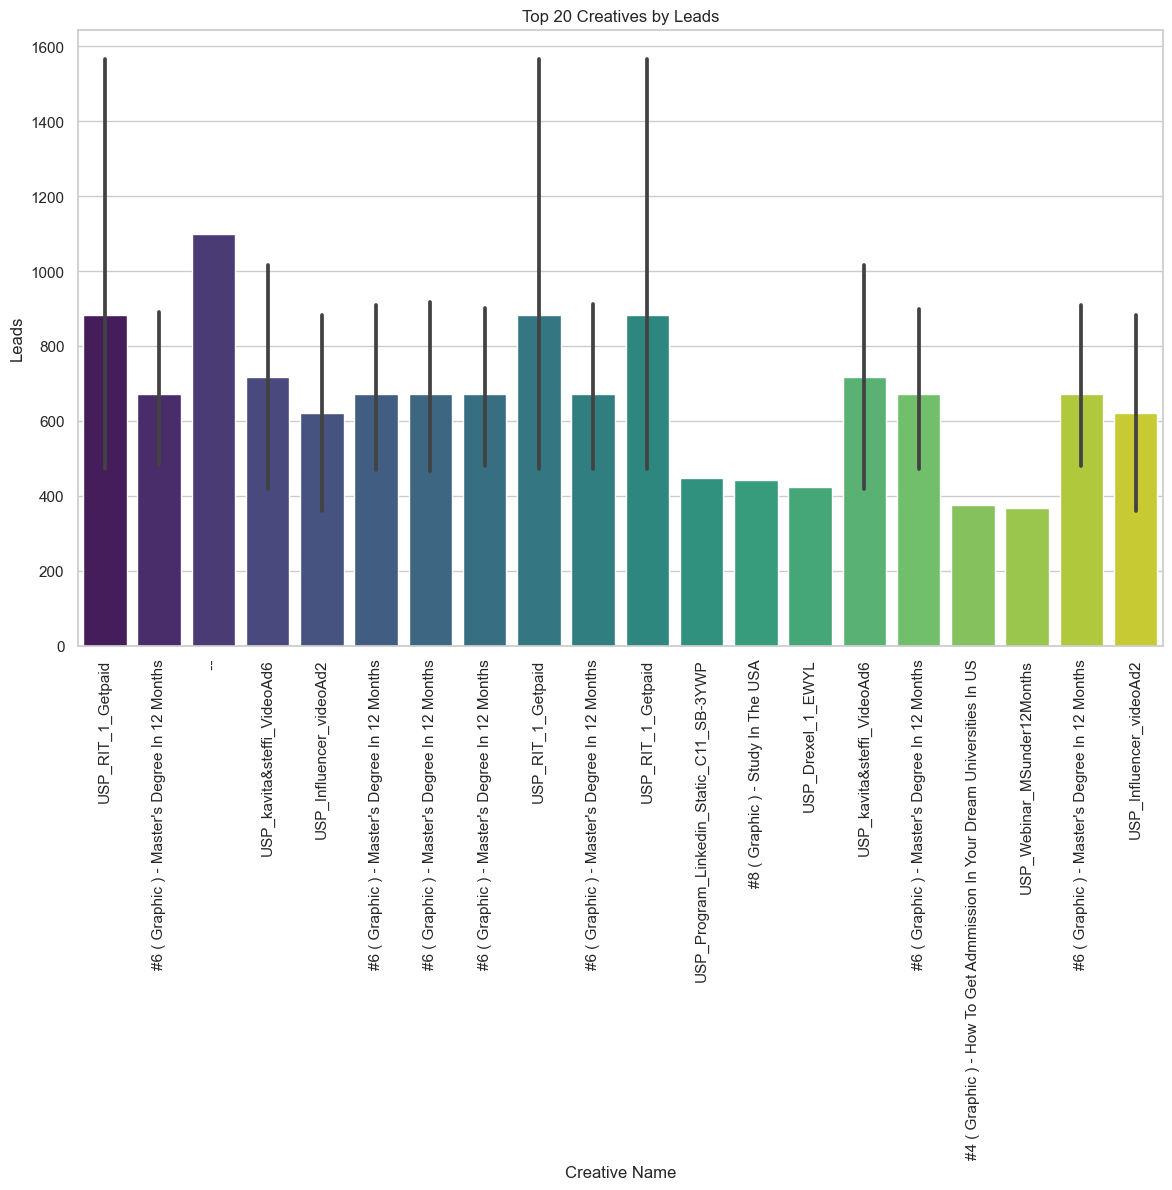

In [39]:
# Aggregate data by creative_name and calculate total spent, impressions, clicks, and leads
creative_metrics = df.groupby(['creative_name', 'campaign_name', 'adset_name','platform'])[['total_spent', 'impressions', 'clicks', 'leads']].sum().reset_index()

# Sort the data by leads in descending order and get the top 20 creatives
top_20_creatives = creative_metrics.sort_values(by='leads', ascending=False).head(20)

# Plot the top 20 creatives by leads
plt.figure(figsize=(14, 8))
sns.barplot(x='creative_name', y='leads', data=top_20_creatives, palette='viridis', order=top_20_creatives['creative_name'].tolist())
plt.title('Top 20 Creatives by Leads')
plt.xlabel('Creative Name')
plt.ylabel('Leads')
plt.xticks(rotation=90)
plt.show()




The chart presents the top 20 creative names ranked by the number of leads generated. It highlights which creatives were most effective in converting interactions into leads. By showing the lead counts for these top-performing creatives, the chart enables comparison of their effectiveness and helps identify which creative names delivered the best results in lead generation. This information can guide future creative strategies and optimize lead acquisition efforts.

In [40]:
# Display details of the top 20 creatives
print("Details of Top 20 Creatives by Leads:")
print(top_20_creatives)

Details of Top 20 Creatives by Leads:
                                          creative_name  \
1147                                  USP_RIT_1_Getpaid   
493       #6 ( Graphic ) - Master's Degree In 12 Months   
1                                                    --   
1333                         USP_kavita&steffi_VideoAd6   
940                             USP_Influencer_videoAd2   
524       #6 ( Graphic ) - Master's Degree In 12 Months   
500       #6 ( Graphic ) - Master's Degree In 12 Months   
504       #6 ( Graphic ) - Master's Degree In 12 Months   
1148                                  USP_RIT_1_Getpaid   
526       #6 ( Graphic ) - Master's Degree In 12 Months   
1146                                  USP_RIT_1_Getpaid   
1014            USP_Program_Linkedin_Static_C11_SB-3YWP   
652                   #8 ( Graphic ) - Study In The USA   
795                                   USP_Drexel_1_EWYL   
1324                         USP_kavita&steffi_VideoAd6   
531       #6 ( Gra

This comprehensive view allows for an in-depth comparison of top-performing creatives, showing their impact across various metrics and helping to identify the most effective strategies for lead generation.

C:\Users\KRUSHNA KOUSHIK\AppData\Local\Temp\ipykernel_4080\1048618588.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='impressions', data=df, palette='viridis', estimator=np.mean, ci=None)


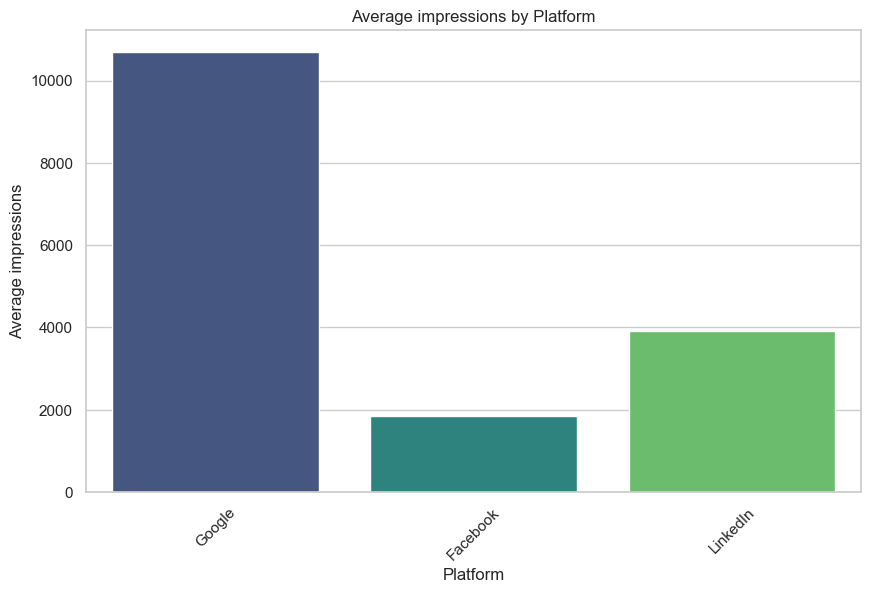

In [41]:


# Plot average impressions by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='impressions', data=df, palette='viridis', estimator=np.mean, ci=None)
plt.title('Average impressions by Platform')
plt.xlabel('Platform')
plt.ylabel('Average impressions')
plt.xticks(rotation=45)
plt.show()


The analysis shows that Google ad sets are achieving higher average impressions or reach compared to other platforms. This indicates that Google campaigns are reaching a larger audience on average, suggesting greater visibility and potential engagement.

C:\Users\KRUSHNA KOUSHIK\AppData\Local\Temp\ipykernel_4080\2669477451.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='leads', data=df, palette='viridis', estimator=sum, ci=None)


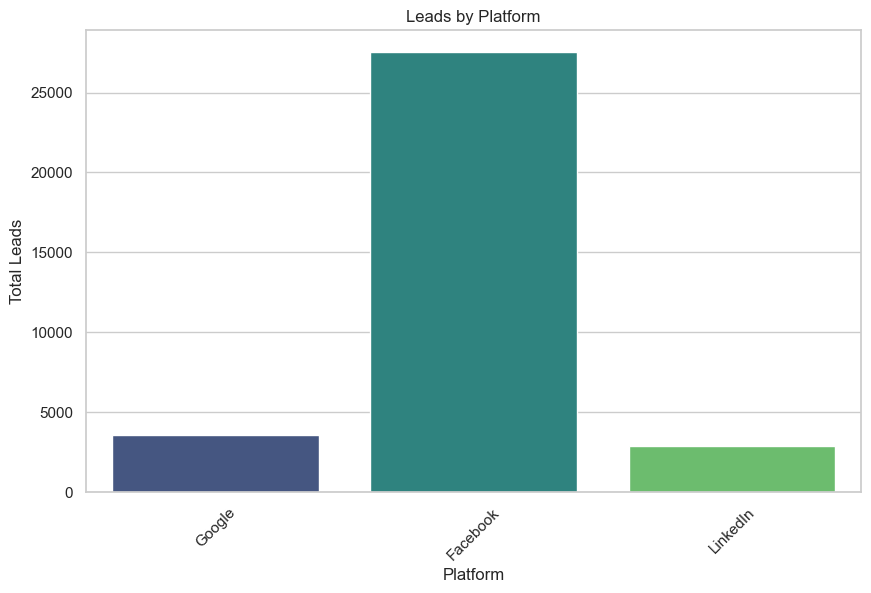

In [42]:
# Plot leads by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='leads', data=df, palette='viridis', estimator=sum, ci=None)
plt.title('Leads by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Leads')
plt.xticks(rotation=45)
plt.show()

Total leads by platform shows that facebook have more because it has more campiagns and all.

C:\Users\KRUSHNA KOUSHIK\AppData\Local\Temp\ipykernel_4080\2387000561.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='leads', data=df, palette='viridis', estimator=np.mean, ci=None)


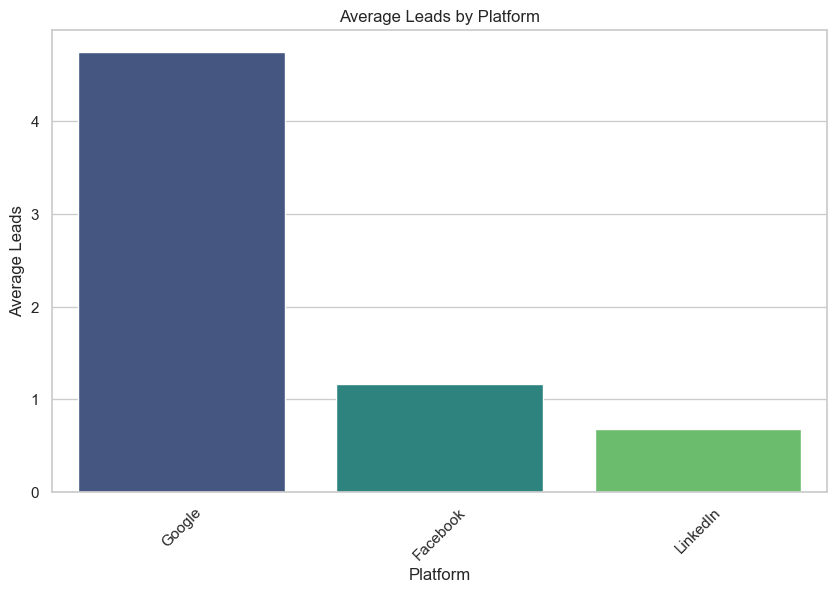

In [43]:


# Plot average leads by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='leads', data=df, palette='viridis', estimator=np.mean, ci=None)
plt.title('Average Leads by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Leads')
plt.xticks(rotation=45)
plt.show()


The analysis indicates that Google ad sets are consistently generating more average leads than those on other platforms. This higher lead generation suggests that Google’s targeting or ad strategies are more effective in converting potential customers into actual leads. The greater average lead count highlights Google's strong performance in attracting and engaging users compared to other advertising platforms. This insight can guide future ad spend decisions and optimization strategies to leverage Google’s effectiveness in lead generation.

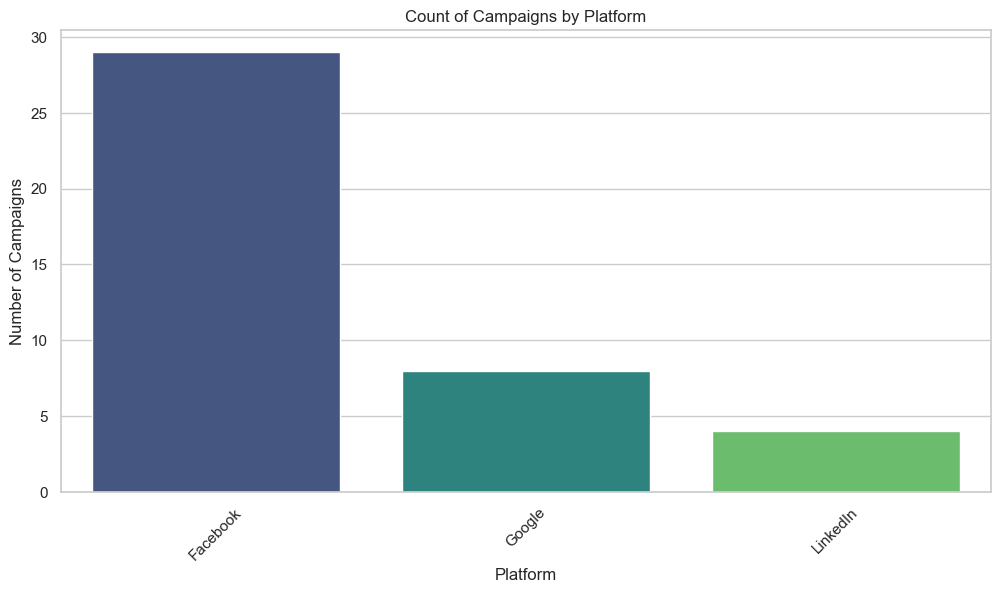

In [44]:
# Count the number of campaigns by platform
campaign_counts_by_platform = df.groupby('platform')['campaign_name'].nunique().reset_index()
campaign_counts_by_platform.columns = ['Platform', 'Campaign Count']

# Plot the count of campaigns by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Campaign Count', data=campaign_counts_by_platform, palette='viridis')
plt.title('Count of Campaigns by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.show()

Facebook has the highest number of campaigns, resulting in a larger number of campaigns with high lead counts. However, due to the large volume of campaigns, the average leads per campaign are lower. This indicates that while Facebook campaigns are numerous and capable of generating many leads overall, the average performance per campaign is reduced compared to platforms like Google, which may have fewer campaigns but higher average leads.

# Conclusion



**Distribution and Skewness**:
The data shows high activity in December, February, and April. Most campaigns have lower total spends, primarily between $100 and $1000. Similarly, impressions are mostly between 100 and 1000, clicks range from 0 to 100, and leads are often between 0 and 5. Campaigns with '0' leads should be re-evaluated or have their budgets reduced.

**Platform Insights**:
Facebook contributes the majority of data points, significantly influencing overall trends. However, Google ad sets outperform other platforms in generating higher average impressions and leads, showing Google's effectiveness in reaching and converting customers.

**Campaign and Creative Analysis**:
Campaigns with more data points tend to have higher reach and engagement. The top 10 campaigns by lead generation show a strong correlation between total spent and leads, indicating efficient budget use. The top 20 creative names by leads highlight effective strategies with detailed metrics such as campaign name, ad set name, total spent, impressions, clicks, and leads.

**Correlation and Relationships**:
The correlation matrix shows that impressions and clicks have a strong direct relationship, while clicks and leads have no significant relationship. Impressions and total spent, as well as leads and total spent, show slight direct relationships, but clicks and total spent have no significant relationship.

**Strategic Insights**:
The analysis identifies the highest financial investments, showing Google campaigns as more effective on average. Facebook campaigns, despite being numerous, have lower average leads per campaign due to volume. Google's superior lead generation should guide future ad spend decisions and optimization strategies.

# Recommendations

To optimize campaign performance and maximize ROI, it is essential to focus on improving or reducing the budget for campaigns that have generated '0' leads, ensuring a more efficient use of resources. Given the higher effectiveness of Google campaigns in generating leads, reallocating more budget to these campaigns can enhance overall lead generation. Additionally, it is crucial to enhance strategies for Facebook campaigns to increase their average lead performance, potentially by refining targeting, creative content, and bidding strategies. These insights and conclusions should guide strategic decisions to optimize campaign performance, allocate budgets more effectively, and leverage the unique strengths of each platform for better overall results. By continuously monitoring and adjusting based on performance data, you can ensure sustained improvement and success in your advertising efforts.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting features and target variable
features = ['clicks', 'total_spent', 'click_through_rate', 'impressions', 'creative_name', 'adset_name', 'campaign_name']
target = 'leads'

# Converting categorical variables into dummy variables
df_dummies = pd.get_dummies(df[features], drop_first=True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_dummies, df[target], test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression:")
print(f"  Mean Absolute Error: {mae_lr}")
print(f"  Mean Squared Error: {mse_lr}")
print(f"  R² Score: {r2_lr}")


Linear Regression:
  Mean Absolute Error: 1.117966062167505
  Mean Squared Error: 7.253360974857454
  R² Score: 0.6144846031324868


**Output :**
The Linear Regression model shows a reasonable predictive performance with an average prediction error of 1.12 leads (MAE) and a manageable average squared error of 7.25 (MSE). The model explains 61.4% of the variance in leads (R²), indicating a moderate to strong fit. Overall, the model effectively captures patterns in lead generation, though there is potential for further improvement.

As Linear Regression did not meet our accuracy expectations, we opted for Random Forest Regression due to its superior ability to handle complex, non-linear relationships. Unlike Linear Regression, which assumes a straight-line relationship between variables, Random Forest Regression leverages an ensemble of decision trees to capture intricate patterns and interactions within the data.

Random Forest Regressor:
  Mean Absolute Error: 0.5375668730288518
  Mean Squared Error: 3.630365880154187
  R² Score: 0.8070464233183396
Top 20 Feature Importances (Random Forest):
clicks                                                                                   0.476358
total_spent                                                                              0.214003
click_through_rate                                                                       0.151406
impressions                                                                              0.033867
creative_name_USP_kavita&steffi_VideoAd6                                                 0.016300
campaign_name_USP Masterclass Cold [ 14th Dec ] - Link Click Ad                          0.012111
adset_name_Open Targeting - Advantage+ audience                                          0.009721
adset_name_Study Abroad                                                                  0.007942
adset_name_MS + Coop All India Ad 

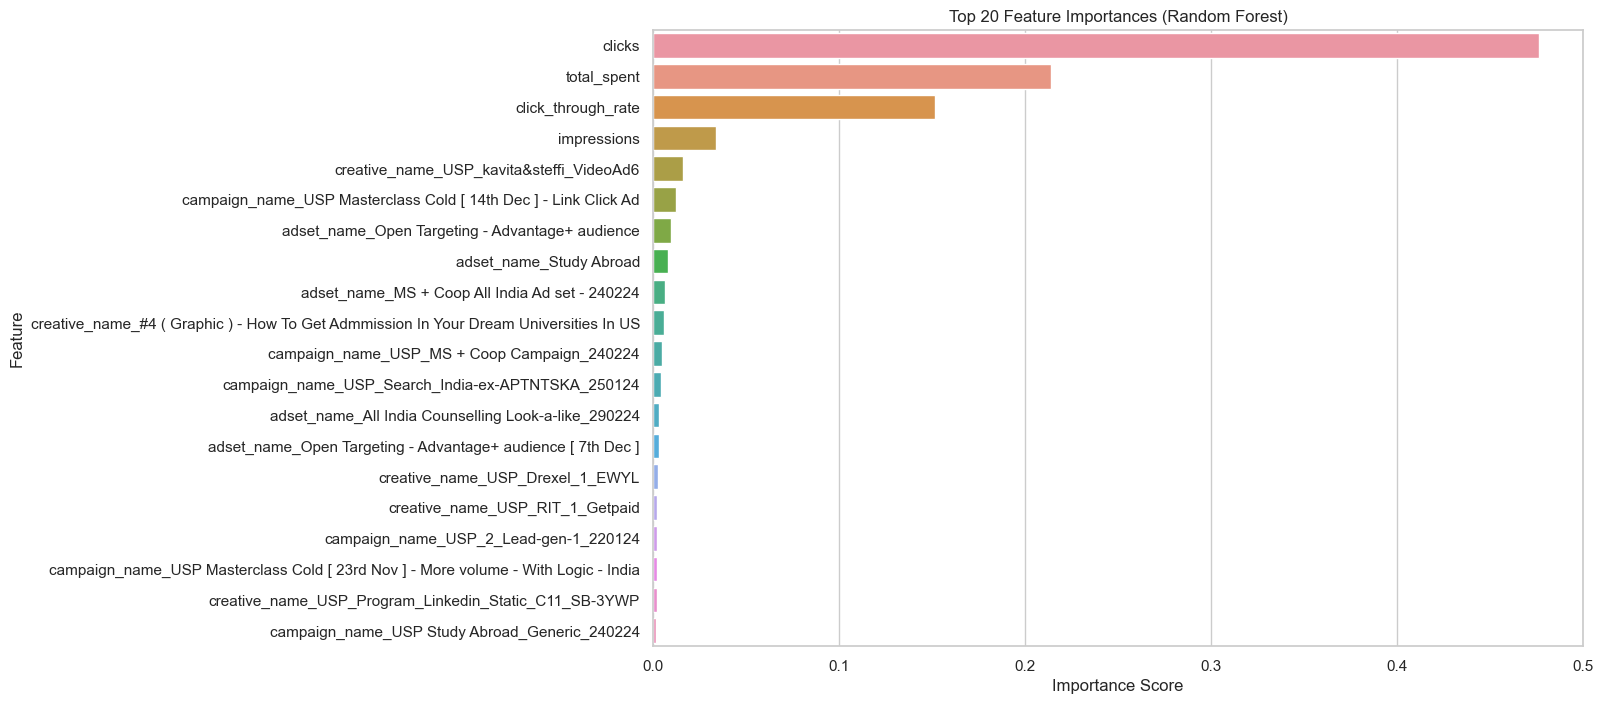

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# Selecting features and target variable
features = ['clicks', 'total_spent', 'click_through_rate', 'impressions', 'creative_name', 'adset_name', 'campaign_name']
target = 'leads'

# Converting categorical variables into dummy variables
df_dummies = pd.get_dummies(df[features], drop_first=True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_dummies, df[target], test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor:")
print(f"  Mean Absolute Error: {mae}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")

# Feature Importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Get top 20 features
top_20_features = feature_importances.head(20)

print("Top 20 Feature Importances (Random Forest):")
print(top_20_features)

# Plotting the top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_features, y=top_20_features.index)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



**Conclusion :**

The Random Forest Regressor has demonstrated strong predictive performance with an R² score of 0.81, indicating that it effectively captures 81% of the variance in lead generation. The model’s Mean Absolute Error (0.54) and Mean Squared Error (3.63) suggest that predictions are reasonably accurate with manageable error levels. Key insights reveal that the most influential factors for generating leads are the number of clicks and total spending, highlighting their crucial roles in campaign effectiveness. The click-through rate also plays a significant role, albeit less impactful. These findings suggest that the company should focus on optimizing click volumes and strategic spending to maximize lead generation. Additionally, refining ad creatives and campaigns based on their impact can further enhance performance. Regular model updates and feature analysis will help sustain and improve lead prediction accuracy, guiding more informed decision-making and strategic planning.